<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue-Forecasting/blob/main/024_randomforest_xgb_search_t_1_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.06.11 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Monthly Revenue Forecasting with Random Forest Regressor & XGB Regressor (Variables: + Search Volume) - Results (2018-2022)**

|Search Volume     |Variables     |
|------------------|--------------|
|t-1|t_sv          |

<br>

### Contents

##### 1. Input Data
*  月營收盈餘 (2013-2022)
*  網路聲量 (2013-2022)：t-1 (*new)

##### 5. Model Training
*  預先訓練多個模型並儲存

##### 7. Predicting Results & Feature Importance
*  Output Functions
*  Random Forest
*  XGB (hyperparameters tuned by 5-fold cross validation)
*  Scores (RMSE, MAPE, MAE, MAE%)

##### 8. Plots
*  Read Saved Results (*new)
*  Expected v.s. Predicted
*  Scores: RMSE, MAPE, MAE, MAE%
*  Feature Importance

##### 9. Best and Worst Model
*  各模型組合中，預測最好和最差的月份
*  Random Forest 和 XGB 各自預測最好和最差的模型組合 (with Feature Importance)
*  所有模型組合中，預測最好和最差的模型組合 (with Feature Importance)


## **0. Setup**

In [ ]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
!pip install import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.2 MB/s eta 0:00:00


In [ ]:
import import_ipynb
%cd '/content/gdrive/Shareddrives/Me/論文/code/Function'

/content/gdrive/.shortcut-targets-by-id/1xHzysZb8eXBG5PPEXnRYMPBvoZ2xqC3u/論文/code/Function


In [ ]:
from MonRevForecast import predictMonthlyRevenue, BestWorstModel, trainMonthlyRevenue

importing Jupyter notebook from MonRevForecast.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.8 MB/s eta 0:00:00


In [ ]:
from MonRevPlot import plotExpectedPredictedRevenues, plotModelExpectedPredictedRevenues

importing Jupyter notebook from MonRevPlot.ipynb


In [ ]:
from MonRevPlot import plotAllScores, compareModelScore, scoreBoxplotV

In [ ]:
from MonRevPlot import plotFeatureImportance, BestWorstModelFeatureImportancePlot

### **Project Path**

In [ ]:
project_path = '/content/gdrive/Shareddrives/Me/論文'

## **1. Input Data**

### **1.1 月營收盈餘 (2013-2022)**

資料期間：2013年1月至2022年12月（共120個月）

資料範圍：上市、櫃公司（排除金融業、生技醫療、建材營造、DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站

In [ ]:
org_data = pd.read_excel(os.path.join(project_path, '資料集/007_v1/201301-202212上市櫃公司月營收_非金融業.xlsx'), index_col=0)
org_data.columns = pd.to_datetime(org_data.columns, format="%Y-%m-%d").to_period('M')
org_data

2013-01  2013-02  2013-03  2013-04  2013-05  2013-06  2013-07  \
公司                                                                        
1101 台泥   9134465  5540346  9457971  9919269  9543782  9517630  9875888   
1102 亞泥   6018213  2552357  5428755  5930748  6239676  5952754  5942364   
1103 嘉泥    288455   166638   286007   365292   382601   302995   294781   
1104 環泥    486481   299860   461732   394631   406677   415968   453397   
1108 幸福    481802   276936   444917   362054   381384   368109   439572   
...           ...      ...      ...      ...      ...      ...      ...   
9951 皇田    201785   167967   240746   243935   238296   193880   198427   
9955 佳龍    394489   383183   428478   564053   336622   295391   434605   
9958 世紀鋼   198944   166364   351222   280864   289332   426371   213281   
9960 邁達康    52534    41935    61642    70998    81508    64525    62085   
9962 有益    298876   327002   313861   241566   251782   273664   174682   

          2013-08   2013-09   2013-10  ...  2022-03  2022-04  2022-05  \
公司                                     ...                              
1101 台泥   9835143  10060975  10654077  ...  9971650  8319342  7733787   
1102 亞泥   5786107   5879394   6478670  ...  8160414  8710220  8000427   
1103 嘉泥    336088    314563    429783  ...   220463   168089   163521   
1104 環泥    393203    448691    521445  ...   591593   638493   537082   
1108 幸福    379115    387362    450770  ...   345612   335518   332258   
...           ...       ...       ...  ...      ...      ...      ...   
9951 皇田    256724    228796    250756  ...   374229   302262   323433   
9955 佳龍    306534    266617    363766  ...    96200   101850    95096   
9958 世紀鋼   302589    401695    255738  ...   626104   401960   673479   
9960 邁達康    60960     60309     61582  ...    60275    86754    69752   
9962 有益    238490    165340    202491  ...   366892   248958   228412   

          2022-06   2022-07   2022-08   2022-09   2022-10  2022-11   2022-12  
公司                                                                            
1101 台泥   9145989  10102468  10689860  10404901  11368096  9674576  12584154  
1102 亞泥   7776413   7864622   7069221   6994078   7601097  8306062   8340507  
1103 嘉泥    183177    178825    182371    205264    209429   221763    228644  
1104 環泥    573028    580420    605512    597159    634981   631827    725055  
1108 幸福    334113    326691    390053    346635    401202   383773    418326  
...           ...       ...       ...       ...       ...      ...       ...  
9951 皇田    371791    337581    468608    464373    432835   500111    506796  
9955 佳龍     80726     85625     81881     79179     80630    91270     84115  
9958 世紀鋼   665459    651699    757968    903198    911834   944060   1082675  
9960 邁達康   103280     64983    105969    113755     78996    96570     58764  
9962 有益    387082    248327    318092    264270    307426   308663    385673  

[1240 rows x 120 columns]

In [ ]:
print("Data shape:", org_data.shape)
print("Data size:", org_data.size)

Data shape: (1240, 120)
Data size: 148800


### **1.2 網路聲量 (2013-2022)：t-1**

In [ ]:
search_volume_data = pd.read_csv(os.path.join(project_path, '資料集/search volume/search_volume_t-1.csv'), index_col = 0)
search_volume_data.columns = pd.to_datetime(search_volume_data.columns, format="%Y-%m-%d").to_period('M')
search_volume_data

2013-01  2013-02  2013-03  2013-04  2013-05  2013-06  2013-07  \
1101 台泥      57.0     66.0      0.0      0.0      0.0     27.0    100.0   
1102 亞泥      85.0      0.0      0.0      0.0      0.0      0.0      0.0   
1103 嘉泥       0.0     58.0      0.0     94.0      0.0      0.0      0.0   
1104 環泥       0.0      0.0     96.0      0.0      0.0     45.0      0.0   
1108 幸福      83.0     56.0     73.0     80.0     65.0     66.0     92.0   
...           ...      ...      ...      ...      ...      ...      ...   
9951 皇田       0.0      0.0      0.0      0.0     18.0      0.0     52.0   
9955 佳龍      43.0      0.0      0.0      0.0      0.0      0.0     42.0   
9958 世紀鋼    100.0      0.0     64.0      0.0     85.0      0.0      0.0   
9960 邁達康    100.0      0.0     78.0      0.0      0.0      0.0     33.0   
9962 有益       0.0      0.0      0.0      0.0     49.0      0.0      0.0   

          2013-08  2013-09  2013-10  ...  2022-03  2022-04  2022-05  2022-06  \
1101 台泥       0.0      0.0      0.0  ...     20.0     53.0     66.0     19.0   
1102 亞泥       0.0      0.0      0.0  ...     54.0     52.0     78.0     74.0   
1103 嘉泥       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
1104 環泥       0.0      0.0      0.0  ...      0.0      0.0     54.0      0.0   
1108 幸福      94.0     74.0     75.0  ...     82.0     92.0     71.0     67.0   
...           ...      ...      ...  ...      ...      ...      ...      ...   
9951 皇田       0.0      0.0      0.0  ...      0.0     39.0     72.0      0.0   
9955 佳龍       0.0      0.0      0.0  ...     32.0    100.0     35.0      0.0   
9958 世紀鋼      0.0      0.0      0.0  ...     38.0      0.0     35.0     32.0   
9960 邁達康      0.0      0.0      0.0  ...     21.0      0.0      0.0      0.0   
9962 有益       0.0     38.0     88.0  ...     89.0     29.0     34.0     30.0   

          2022-07  2022-08  2022-09  2022-10  2022-11  2022-12  
1101 台泥      58.0     30.0     62.0     57.0     79.0     73.0  
1102 亞泥      70.0     50.0     81.0     49.0      0.0    100.0  
1103 嘉泥      28.0      0.0      0.0      0.0      0.0     29.0  
1104 環泥       0.0      0.0      0.0      0.0     58.0      0.0  
1108 幸福      69.0     77.0     84.0     77.0     92.0     62.0  
...           ...      ...      ...      ...      ...      ...  
9951 皇田      46.0      0.0      0.0      0.0      0.0      0.0  
9955 佳龍      36.0     43.0     37.0     71.0      0.0      0.0  
9958 世紀鋼      0.0     48.0     60.0     23.0    100.0      0.0  
9960 邁達康    100.0      0.0     49.0     47.0     35.0     27.0  
9962 有益      38.0     41.0     80.0     66.0      0.0     38.0  

[1240 rows x 120 columns]

In [ ]:
print("Data shape:", search_volume_data.shape)
print("Data size:", search_volume_data.size)

Data shape: (1240, 120)
Data size: 148800


## **5. Model Training**

#### **5.1.3 預先訓練多個模型並儲存**

2023.04.06

In [ ]:
test_y_1 = 2018
test_y_2 = 2019
test_y_3 = 2020
test_y_4 = 2021
test_y_5 = 2022
start_m_1 = 1 
end_m_1 = 12

##### **Random Forest**
40 min.

In [ ]:
model_save_path_rf = os.path.join(project_path, 'model/search_volume/t-1/rf')

2018

In [ ]:
trainMonthlyRevenue(org_data, test_y_1, start_m_1, test_y_1, end_m_1, 'rf', model_save_path_rf, search_volume_data = search_volume_data)

2018-01 model saved. Using time: 55.028  secs.
2018-02 model saved. Using time: 60.978  secs.
2018-03 model saved. Using time: 47.227  secs.
2018-04 model saved. Using time: 44.725  secs.
2018-05 model saved. Using time: 44.842  secs.
2018-06 model saved. Using time: 46.244  secs.
2018-07 model saved. Using time: 48.220  secs.
2018-08 model saved. Using time: 46.984  secs.
2018-09 model saved. Using time: 46.823  secs.
2018-10 model saved. Using time: 48.176  secs.
2018-11 model saved. Using time: 45.519  secs.
2018-12 model saved. Using time: 53.369  secs.


2019

In [ ]:
trainMonthlyRevenue(org_data, test_y_2, start_m_1, test_y_2, end_m_1, 'rf', model_save_path_rf, search_volume_data = search_volume_data)

2019-01 model saved. Using time: 46.419  secs.
2019-02 model saved. Using time: 51.721  secs.
2019-03 model saved. Using time: 45.642  secs.
2019-04 model saved. Using time: 46.634  secs.
2019-05 model saved. Using time: 46.439  secs.
2019-06 model saved. Using time: 48.454  secs.
2019-07 model saved. Using time: 46.538  secs.
2019-08 model saved. Using time: 47.501  secs.
2019-09 model saved. Using time: 45.596  secs.
2019-10 model saved. Using time: 49.674  secs.
2019-11 model saved. Using time: 47.094  secs.
2019-12 model saved. Using time: 46.964  secs.


2020

In [ ]:
trainMonthlyRevenue(org_data, test_y_3, start_m_1, test_y_3, end_m_1, 'rf', model_save_path_rf, search_volume_data = search_volume_data)

2020-01 model saved. Using time: 47.763  secs.
2020-02 model saved. Using time: 50.534  secs.
2020-03 model saved. Using time: 46.448  secs.
2020-04 model saved. Using time: 46.514  secs.
2020-05 model saved. Using time: 45.338  secs.
2020-06 model saved. Using time: 48.283  secs.
2020-07 model saved. Using time: 54.169  secs.
2020-08 model saved. Using time: 47.862  secs.
2020-09 model saved. Using time: 46.492  secs.
2020-10 model saved. Using time: 48.799  secs.
2020-11 model saved. Using time: 56.643  secs.
2020-12 model saved. Using time: 48.777  secs.


2021

In [ ]:
trainMonthlyRevenue(org_data, test_y_4, start_m_1, test_y_4, end_m_1, 'rf', model_save_path_rf, search_volume_data = search_volume_data)

2021-01 model saved. Using time: 44.544  secs.
2021-02 model saved. Using time: 47.900  secs.
2021-03 model saved. Using time: 47.615  secs.
2021-04 model saved. Using time: 44.634  secs.
2021-05 model saved. Using time: 43.792  secs.
2021-06 model saved. Using time: 44.389  secs.
2021-07 model saved. Using time: 48.965  secs.
2021-08 model saved. Using time: 45.854  secs.
2021-09 model saved. Using time: 44.379  secs.
2021-10 model saved. Using time: 45.901  secs.
2021-11 model saved. Using time: 49.032  secs.
2021-12 model saved. Using time: 44.585  secs.


2022

In [ ]:
trainMonthlyRevenue(org_data, test_y_5, start_m_1, test_y_5, end_m_1, 'rf', model_save_path_rf, search_volume_data = search_volume_data)

2022-01 model saved. Using time: 43.496  secs.
2022-02 model saved. Using time: 43.521  secs.
2022-03 model saved. Using time: 46.540  secs.
2022-04 model saved. Using time: 44.052  secs.
2022-05 model saved. Using time: 44.593  secs.
2022-06 model saved. Using time: 43.680  secs.
2022-07 model saved. Using time: 42.726  secs.
2022-08 model saved. Using time: 47.118  secs.
2022-09 model saved. Using time: 46.200  secs.
2022-10 model saved. Using time: 44.623  secs.
2022-11 model saved. Using time: 44.729  secs.
2022-12 model saved. Using time: 48.420  secs.


##### **XGB**

10 min. with GPU
<br>
Grid Search: Hyperparameters tuned by 5-fold cross validation.


In [ ]:
model_save_path_xgb = os.path.join(project_path, 'model/search_volume/t-1/xgb')

2018

In [ ]:
trainMonthlyRevenue(org_data, test_y_1, start_m_1, test_y_1, end_m_1, 'xgb', model_save_path_xgb, search_volume_data = search_volume_data)

2018-01 model saved. Using time: 13.837  secs.
2018-02 model saved. Using time: 12.322  secs.
2018-03 model saved. Using time: 12.066  secs.
2018-04 model saved. Using time: 13.575  secs.
2018-05 model saved. Using time: 12.164  secs.
2018-06 model saved. Using time: 12.724  secs.
2018-07 model saved. Using time: 12.384  secs.
2018-08 model saved. Using time: 15.642  secs.
2018-09 model saved. Using time: 31.288  secs.
2018-10 model saved. Using time: 10.161  secs.
2018-11 model saved. Using time: 9.930  secs.
2018-12 model saved. Using time: 10.604  secs.


2019

In [ ]:
trainMonthlyRevenue(org_data, test_y_2, start_m_1, test_y_2, end_m_1, 'xgb', model_save_path_xgb, search_volume_data = search_volume_data)

2019-01 model saved. Using time: 13.135  secs.
2019-02 model saved. Using time: 14.757  secs.
2019-03 model saved. Using time: 11.391  secs.
2019-04 model saved. Using time: 12.274  secs.
2019-05 model saved. Using time: 13.439  secs.
2019-06 model saved. Using time: 12.349  secs.
2019-07 model saved. Using time: 12.214  secs.
2019-08 model saved. Using time: 12.976  secs.
2019-09 model saved. Using time: 12.426  secs.
2019-10 model saved. Using time: 12.584  secs.
2019-11 model saved. Using time: 12.148  secs.
2019-12 model saved. Using time: 12.396  secs.


2020

In [ ]:
trainMonthlyRevenue(org_data, test_y_3, start_m_1, test_y_3, end_m_1, 'xgb', model_save_path_xgb, search_volume_data = search_volume_data)

2020-01 model saved. Using time: 12.354  secs.
2020-02 model saved. Using time: 28.645  secs.
2020-03 model saved. Using time: 34.925  secs.
2020-04 model saved. Using time: 18.386  secs.
2020-05 model saved. Using time: 10.251  secs.
2020-06 model saved. Using time: 12.044  secs.
2020-07 model saved. Using time: 12.540  secs.
2020-08 model saved. Using time: 12.366  secs.
2020-09 model saved. Using time: 12.292  secs.
2020-10 model saved. Using time: 13.053  secs.
2020-11 model saved. Using time: 12.302  secs.
2020-12 model saved. Using time: 12.406  secs.


2021

In [ ]:
trainMonthlyRevenue(org_data, test_y_4, start_m_1, test_y_4, end_m_1, 'xgb', model_save_path_xgb, search_volume_data = search_volume_data)

2021-01 model saved. Using time: 32.317  secs.
2021-02 model saved. Using time: 10.023  secs.
2021-03 model saved. Using time: 10.316  secs.
2021-04 model saved. Using time: 11.899  secs.
2021-05 model saved. Using time: 12.557  secs.
2021-06 model saved. Using time: 14.939  secs.
2021-07 model saved. Using time: 19.592  secs.
2021-08 model saved. Using time: 10.517  secs.
2021-09 model saved. Using time: 9.864  secs.
2021-10 model saved. Using time: 10.990  secs.
2021-11 model saved. Using time: 12.026  secs.
2021-12 model saved. Using time: 12.809  secs.


2022

In [ ]:
trainMonthlyRevenue(org_data, test_y_5, start_m_1, test_y_5, end_m_1, 'xgb', model_save_path_xgb, search_volume_data = search_volume_data)

2022-01 model saved. Using time: 12.376  secs.
2022-02 model saved. Using time: 12.490  secs.
2022-03 model saved. Using time: 12.112  secs.
2022-04 model saved. Using time: 12.428  secs.
2022-05 model saved. Using time: 12.501  secs.
2022-06 model saved. Using time: 13.078  secs.
2022-07 model saved. Using time: 12.694  secs.
2022-08 model saved. Using time: 12.516  secs.
2022-09 model saved. Using time: 12.246  secs.
2022-10 model saved. Using time: 11.781  secs.
2022-11 model saved. Using time: 10.041  secs.
2022-12 model saved. Using time: 10.280  secs.


## **7. Predicting Results & Feature Importance**

y_train = y_test 往前 12 個月

<br>

||訓練資料X|訓練資料y|測試資料X|測試資料y|
|---|---|---|---|---|
|Start|2013-01 - 2016-12|2017-01|2014-01 - 2017-12|**2018-01**|
|End|2017-12 - 2021-11|2021-12|2018-12 - 2022-11|**2022-12**|

In [ ]:
file_category = 'search_volume'
search_volume_type = 't-1'

# 預測年月
start_y = 2018
start_m = 1
end_y = 2022
end_m = 12

### **7.1 Output Functions**

In [ ]:
# Output data path
output_data_path = '/content/gdrive/Shareddrives/Me/論文/Results'

In [ ]:
# Output (2023.04.04)
def outputPredictingResults(category: str, modelName: str, pred: dict, searchType: str):
    pred['org']['org'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/org_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['org']['dec'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['org']['season'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['def']['org'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/def_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['def']['dec'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_def_pred_{modelName}_{category}_{searchType}.xlsx'))
    pred['def']['season'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_def_pred_{modelName}_{category}_{searchType}.xlsx'))

def outputFeatureImportance(category: str, modelName: str, feature_importance: dict, searchType: str):
    feature_importance['org']['org'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/org_feature_{modelName}_{category}_{searchType}.xlsx'))
    feature_importance['org']['dec'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_feature_{modelName}_{category}_{searchType}.xlsx'))
    feature_importance['org']['season'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_feature_{modelName}_{category}_{searchType}.xlsx'))
    feature_importance['def']['org'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/def_feature_{modelName}_{category}_{searchType}.xlsx'))
    feature_importance['def']['dec'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_def_feature_{modelName}_{category}_{searchType}.xlsx'))
    feature_importance['def']['season'].to_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_def_feature_{modelName}_{category}_{searchType}.xlsx'))

def outputScores(category: str, modelName: str, scoresD: pd.DataFrame, searchType: str):
    scoresD.to_excel(os.path.join(output_data_path, f'{category}/{searchType}/scores_{modelName}_{category}_{searchType}.xlsx'))

### **7.2 Random Forest**

In [ ]:
# Load trained models
model_save_path_rf = os.path.join(project_path, 'model/search_volume/t-1/rf')

In [ ]:
# Random Forest (3 min)
pred_rf, feature_importance_rf, scores_rf = predictMonthlyRevenue(org_data, start_y, start_m, end_y, end_m, 'rf', model_save_path_rf, search_volume_data = search_volume_data)

Using time: 181.392  secs.


In [ ]:
# Output (2023.04.04)
outputPredictingResults(file_category, 'rf', pred_rf, search_volume_type)
outputFeatureImportance(file_category, 'rf', feature_importance_rf, search_volume_type)
outputScores(file_category, 'rf', scores_rf, search_volume_type)

#### **7.2.1 Predicting Results**

In [ ]:
# Original
print(pred_rf['org']['org'].shape)
print(pred_rf['org']['dec'].shape)
print(pred_rf['org']['season'].shape)
pred_rf['org']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


2018-01    2018-02    2018-03    2018-04    2018-05    2018-06  \
1101 台泥  7482262.0  6511291.0  8534988.0  8212805.0  9250635.0  9476850.0   
1102 亞泥  4879717.0  4858569.0  5578548.0  5201342.0  5742213.0  5697874.0   
1103 嘉泥   181135.0   153415.0   186888.0   162111.0   166554.0   182482.0   
1104 環泥   342876.0   389960.0   380385.0   383031.0   394438.0   420971.0   

            2018-07     2018-08     2018-09    2018-10  ...    2022-03  \
1101 台泥  10275298.0  11002776.0  10857365.0  9625085.0  ...  8561307.0   
1102 亞泥   5863054.0   6497267.0   6977966.0  7439772.0  ...  6935803.0   
1103 嘉泥    187265.0    168573.0    204492.0   164068.0  ...   197504.0   
1104 環泥    381999.0    401952.0    383868.0   384948.0  ...   556983.0   

           2022-04    2022-05    2022-06    2022-07     2022-08     2022-09  \
1101 台泥  9667479.0  8782530.0  8380910.0  8568759.0  10355342.0  11874146.0   
1102 亞泥  7797672.0  8041724.0  8251458.0  8544469.0   8475266.0   8279745.0   
1103 嘉泥   208053.0   197672.0   181354.0   195078.0    180058.0    186034.0   
1104 環泥   551643.0   666792.0   536113.0   585413.0    576349.0    603576.0   

            2022-10     2022-11     2022-12  
1101 台泥  10453249.0  11021574.0  11876520.0  
1102 亞泥   7825730.0   8693706.0   8773202.0  
1103 嘉泥    192716.0    208310.0    216187.0  
1104 環泥    598927.0    640105.0    614529.0  

[4 rows x 60 columns]

In [ ]:
# Deflating
print(pred_rf['def']['org'].shape)
print(pred_rf['def']['dec'].shape)
print(pred_rf['def']['season'].shape)
pred_rf['def']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


2018-01    2018-02    2018-03    2018-04     2018-05     2018-06  \
1101 台泥  7513322.0  8047136.0  8304515.0  8095019.0  10285668.0  11135431.0   
1102 亞泥  4931138.0  5257702.0  5798840.0  5711467.0   6568567.0   7493533.0   
1103 嘉泥   156759.0   127920.0   173088.0   167393.0    175548.0    174568.0   
1104 環泥   353977.0   361805.0   389848.0   388185.0    393168.0    441186.0   

            2018-07     2018-08     2018-09     2018-10  ...    2022-03  \
1101 台泥  10355621.0  11364610.0  11182699.0  10192507.0  ...  8489576.0   
1102 亞泥   7146043.0   7849082.0   7471449.0   7191443.0  ...  8169938.0   
1103 嘉泥    178043.0    162431.0    190659.0    177844.0  ...   166281.0   
1104 環泥    361773.0    364107.0    375434.0    378095.0  ...   549767.0   

           2022-04    2022-05    2022-06    2022-07     2022-08     2022-09  \
1101 台泥  9566494.0  8964328.0  8622876.0  8734530.0  10197846.0  11566105.0   
1102 亞泥  8191208.0  8776263.0  7980499.0  8119368.0   8427453.0   7596886.0   
1103 嘉泥   209721.0   177753.0   163020.0   179091.0    182604.0    184953.0   
1104 環泥   569481.0   606076.0   552351.0   590749.0    598765.0    606995.0   

           2022-10     2022-11     2022-12  
1101 台泥  9883954.0  11592038.0  11017117.0  
1102 亞泥  7683762.0   8167655.0   9273670.0  
1103 嘉泥   203661.0    221166.0    221648.0  
1104 環泥   590807.0    644799.0    647804.0  

[4 rows x 60 columns]

#### **7.2.2 Feature Importance**

In [ ]:
print(feature_importance_rf['org']['org'].shape)
print(feature_importance_rf['org']['dec'].shape)
print(feature_importance_rf['org']['season'].shape)
feature_importance_rf['org']['org'].head(4)

(49, 60)
(145, 60)
(49, 60)


2018-01  2018-02  2018-03  2018-04  2018-05  2018-06  2018-07  2018-08  \
t-48   0.0139   0.0109   0.0087   0.0108   0.0108   0.0106   0.0132   0.0128   
t-47   0.0018   0.0003   0.0209   0.0016   0.0054   0.0012   0.0010   0.0002   
t-46   0.0293   0.0590   0.0214   0.0222   0.0227   0.0144   0.0280   0.0205   
t-45   0.0199   0.0276   0.0205   0.0195   0.0138   0.0194   0.0175   0.0150   

      2018-09  2018-10  ...  2022-03  2022-04  2022-05  2022-06  2022-07  \
t-48   0.0195   0.0175  ...   0.0221   0.0097   0.0109   0.0101   0.0103   
t-47   0.0031   0.0005  ...   0.0031   0.0022   0.0023   0.0020   0.0006   
t-46   0.0214   0.0156  ...   0.0215   0.0251   0.0238   0.0201   0.0216   
t-45   0.0210   0.0179  ...   0.0179   0.0168   0.0183   0.0177   0.0182   

      2022-08  2022-09  2022-10  2022-11  2022-12  
t-48   0.0133   0.0103   0.0115   0.0131   0.0174  
t-47   0.0030   0.0024   0.0039   0.0005   0.0022  
t-46   0.0068   0.0247   0.0298   0.0146   0.0216  
t-45   0.0179   0.0170   0.0176   0.0178   0.0213  

[4 rows x 60 columns]

In [ ]:
print(feature_importance_rf['def']['org'].shape)
print(feature_importance_rf['def']['dec'].shape)
print(feature_importance_rf['def']['season'].shape)
feature_importance_rf['def']['org'].head(4)

(49, 60)
(145, 60)
(49, 60)


2018-01  2018-02  2018-03  2018-04  2018-05  2018-06  2018-07  2018-08  \
t-48   0.0054   0.0101   0.0055   0.0597   0.0042   0.0056   0.0048   0.0026   
t-47   0.0102   0.0083   0.0057   0.0212   0.0065   0.0084   0.0057   0.0023   
t-46   0.0052   0.0049   0.0043   0.0079   0.0041   0.0049   0.0039   0.0033   
t-45   0.0057   0.0075   0.0051   0.0040   0.0041   0.0041   0.0045   0.0092   

      2018-09  2018-10  ...  2022-03  2022-04  2022-05  2022-06  2022-07  \
t-48   0.0039   0.0041  ...   0.0088   0.0040   0.0033   0.0038   0.0043   
t-47   0.0039   0.0033  ...   0.0058   0.0048   0.0062   0.0077   0.0040   
t-46   0.0047   0.0050  ...   0.0049   0.0044   0.0029   0.0053   0.0042   
t-45   0.0046   0.0066  ...   0.0052   0.0060   0.0033   0.0078   0.0028   

      2022-08  2022-09  2022-10  2022-11  2022-12  
t-48   0.0032   0.0043   0.0050   0.0072   0.0073  
t-47   0.0033   0.0055   0.0050   0.0043   0.0078  
t-46   0.0043   0.0050   0.0052   0.0058   0.0060  
t-45   0.0031   0.0045   0.0053   0.0065   0.0200  

[4 rows x 60 columns]

### **7.3 XGB**
Hyperparameters tuned by 5-fold cross validation.

In [ ]:
# Load trained models
model_save_path_xgb = os.path.join(project_path, 'model/search_volume/t-1/xgb')

In [ ]:
# XGB (2.5 min. with GPU)
pred_xgb, feature_importance_xgb, scores_xgb = predictMonthlyRevenue(org_data, start_y, start_m, end_y, end_m, 'xgb', model_save_path_xgb, search_volume_data = search_volume_data)

Using time: 159.622  secs.


In [ ]:
# Output
outputPredictingResults(file_category, 'xgb', pred_xgb, search_volume_type)
outputFeatureImportance(file_category, 'xgb', feature_importance_xgb, search_volume_type)
outputScores(file_category, 'xgb', scores_xgb, search_volume_type)

#### **7.3.1 Predicting Results**

In [ ]:
print(pred_xgb['org']['org'].shape)
print(pred_xgb['org']['dec'].shape)
print(pred_xgb['org']['season'].shape)
pred_xgb['org']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


2018-01    2018-02    2018-03    2018-04    2018-05    2018-06  \
1101 台泥  7942738.0  7352823.0  8422056.0  7575501.0  7638067.0  8603518.0   
1102 亞泥  5348292.0  4963672.0  5676258.0  5095984.0  5264860.0  5751136.0   
1103 嘉泥   230534.0   189165.0   245354.0   240391.0   234766.0   254877.0   
1104 環泥   394330.0   371150.0   432307.0   395057.0   448716.0   448116.0   

           2018-07    2018-08     2018-09     2018-10  ...     2022-03  \
1101 台泥  8415989.0  9049347.0  10090799.0  10239299.0  ...  10849661.0   
1102 亞泥  5727596.0  6118786.0   6873782.0   6904590.0  ...   8118751.0   
1103 嘉泥   446908.0   232633.0    263741.0    130826.0  ...    232873.0   
1104 環泥   400750.0   431131.0    460892.0    383184.0  ...    549189.0   

            2022-04     2022-05    2022-06     2022-07    2022-08     2022-09  \
1101 台泥  10569334.0  10081186.0  9918480.0  10042402.0  9781353.0  12093170.0   
1102 亞泥   7966244.0   7762551.0  8086173.0   7915816.0  7982632.0   9456459.0   
1103 嘉泥    196580.0    243651.0   176162.0    296319.0   171692.0    146216.0   
1104 環泥    510990.0    641395.0   504442.0    582045.0   519783.0    569895.0   

            2022-10     2022-11     2022-12  
1101 台泥  11631493.0  12627052.0  13321908.0  
1102 亞泥   8901098.0   9624579.0  10232115.0  
1103 嘉泥    109766.0    118712.0     50883.0  
1104 環泥    503182.0    621542.0    560520.0  

[4 rows x 60 columns]

In [ ]:
print(pred_xgb['def']['org'].shape)
print(pred_xgb['def']['dec'].shape)
print(pred_xgb['def']['season'].shape)
pred_xgb['def']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


2018-01    2018-02    2018-03    2018-04     2018-05     2018-06  \
1101 台泥  7564082.0  7884844.0  8882265.0  8491641.0  10018289.0  11183786.0   
1102 亞泥  4926231.0  4712522.0  6089835.0  5506361.0   6586209.0   7227344.0   
1103 嘉泥   118528.0   105679.0   155444.0   171684.0    174196.0    163595.0   
1104 環泥   342099.0   334687.0   398328.0   370513.0    383665.0    413820.0   

            2018-07     2018-08     2018-09     2018-10  ...    2022-03  \
1101 台泥  10718944.0  10951327.0  10619926.0  10663820.0  ...  8924841.0   
1102 亞泥   7399666.0   7452229.0   7361289.0   7311600.0  ...  7544387.0   
1103 嘉泥    141690.0    172513.0    193721.0    201473.0  ...   161281.0   
1104 環泥    361486.0    357577.0    346208.0    382871.0  ...   554041.0   

           2022-04    2022-05    2022-06    2022-07    2022-08     2022-09  \
1101 台泥  9371530.0  8323729.0  8559955.0  8353083.0  9528690.0  10480358.0   
1102 亞泥  8351087.0  8256779.0  7997123.0  8060336.0  7944096.0   7521969.0   
1103 嘉泥   187502.0   173135.0   168547.0   177451.0   187265.0    185820.0   
1104 環泥   591730.0   592960.0   561811.0   578613.0   608408.0    611505.0   

            2022-10     2022-11     2022-12  
1101 台泥  10156384.0  11775919.0  11830711.0  
1102 亞泥   7449780.0   8298730.0   8916216.0  
1103 嘉泥    200567.0    218915.0    220500.0  
1104 環泥    622239.0    662128.0    670037.0  

[4 rows x 60 columns]

#### **7.3.2 Feature Importance**

In [ ]:
print(feature_importance_xgb['org']['org'].shape)
print(feature_importance_xgb['org']['dec'].shape)
print(feature_importance_xgb['org']['season'].shape)
feature_importance_xgb['org']['org'].head(4)

(49, 60)
(145, 60)
(49, 60)


2018-01  2018-02  2018-03  2018-04  2018-05  2018-06  2018-07  2018-08  \
t-48   0.0201   0.0256   0.0277   0.0255   0.0241   0.0176   0.0160   0.0238   
t-47   0.0232   0.0246   0.0216   0.0278   0.0191   0.0097   0.0199   0.0149   
t-46   0.0032   0.0195   0.0187   0.0202   0.0174   0.0186   0.0254  -0.0057   
t-45   0.0157   0.0176   0.0194   0.0165   0.0285   0.0118   0.0026  -0.0144   

      2018-09  2018-10  ...  2022-03  2022-04  2022-05  2022-06  2022-07  \
t-48   0.0428   0.0155  ...   0.0515   0.0293   0.0289   0.0504   0.0327   
t-47   0.0134   0.0128  ...   0.0183   0.0144   0.0232   0.0279   0.0485   
t-46   0.0100   0.0089  ...   0.0425   0.0146   0.0178   0.0528  -0.0014   
t-45   0.0042   0.0088  ...   0.0464   0.0083   0.0250  -0.0015  -0.0067   

      2022-08  2022-09  2022-10  2022-11  2022-12  
t-48   0.0504   0.0176   0.0176   0.0195   0.0430  
t-47  -0.0033   0.0163   0.0155   0.0164   0.0108  
t-46  -0.0101   0.0167   0.0126   0.0125  -0.0046  
t-45  -0.0055   0.0135   0.0123   0.0060   0.0062  

[4 rows x 60 columns]

In [ ]:
print(feature_importance_xgb['def']['org'].shape)
print(feature_importance_xgb['def']['dec'].shape)
print(feature_importance_xgb['def']['season'].shape)
feature_importance_xgb['def']['org'].head(4)

(49, 60)
(145, 60)
(49, 60)


2018-01  2018-02  2018-03  2018-04  2018-05  2018-06  2018-07  2018-08  \
t-48   0.0141  -0.0947  -1.1230  -0.1938   0.0666  -0.2145  -0.0472   0.1665   
t-47  -0.0464  -0.0173   0.8065   0.1827  -0.0697   0.0738   0.0668   0.0756   
t-46   0.0569   0.0241   0.2647  -0.0389   0.1237   0.3863   0.0612   0.5268   
t-45   0.0812   0.0920   0.8746   0.0690   0.1660   0.3638   0.0995  -0.5015   

      2018-09  2018-10  ...  2022-03  2022-04  2022-05  2022-06  2022-07  \
t-48  -0.0063   0.0314  ...  -0.1695  -0.0313  -0.0158  -0.0239   0.0303   
t-47   0.1873  -0.0217  ...   0.1582   0.0894   0.0445   0.0925   0.0409   
t-46   0.0522   0.1573  ...   0.2014   0.1060   0.1522   0.0502   0.0260   
t-45   0.1040   0.0920  ...   0.1571   0.1011  -0.0919   0.0184   0.0495   

      2022-08  2022-09  2022-10  2022-11  2022-12  
t-48   0.0839  -0.0255  -0.0156   0.0326   0.0021  
t-47  -0.0436   0.0532   0.0450   0.0723   0.1327  
t-46   0.0315   0.0940   0.0304   0.0467   0.0823  
t-45   0.1335   0.0442   0.0296   0.0388  -0.1054  

[4 rows x 60 columns]

### **7.4 Scores**

In [ ]:
# Random Forest
scores_rf

RMSE-org   MAE-org  MAE%-org  MAPE-org   RMSE-def   MAE-def  \
2018-01   4895335.0  400410.0    0.2056    0.3152  1629595.0  247260.0   
2018-02   2306775.0  257341.0    0.1727    0.3377  2279115.0  257308.0   
2018-03   3436881.0  264392.0    0.1408    0.1954   919132.0  168980.0   
2018-04   3699094.0  290067.0    0.1617    0.1768   741643.0  146814.0   
2018-05   4399571.0  299886.0    0.1584    0.1515   762557.0  142998.0   
2018-06   4871072.0  318457.0    0.1663    0.2343  1500296.0  198574.0   
2018-07   5017472.0  307520.0    0.1562    0.2082   843234.0  136497.0   
2018-08   4999805.0  308920.0    0.1500    0.1907  1510678.0  180999.0   
2018-09   7598581.0  387591.0    0.1736    0.2023  4004745.0  246566.0   
2018-10   7345739.0  390775.0    0.1707    0.1728  2990248.0  262107.0   
2018-11   6580933.0  399046.0    0.1774    0.2207   984485.0  166740.0   
2018-12   5402029.0  358348.0    0.1666    0.4796  2395158.0  234027.0   
2019-01   3969710.0  322455.0    0.1650    0.2749  1820211.0  233022.0   
2019-02   2208990.0  238536.0    0.1664    0.3393  1741223.0  212950.0   
2019-03   3965548.0  278774.0    0.1484    0.2205   676005.0  149678.0   
2019-04   4086180.0  269860.0    0.1464    0.2899   670805.0  133671.0   
2019-05   4192075.0  273976.0    0.1447    0.1875   640103.0  132414.0   
2019-06   3978028.0  301931.0    0.1594    0.1932   834220.0  150047.0   
2019-07   3631747.0  244235.0    0.1262    0.1824   764455.0  138208.0   
2019-08   3681332.0  287054.0    0.1453    0.1998  1522768.0  175380.0   
2019-09   5867713.0  354833.0    0.1609    0.2408  4048901.0  262010.0   
2019-10   5385005.0  338216.0    0.1540    0.1827  1706553.0  173995.0   
2019-11   5417411.0  303380.0    0.1390    0.1523   923796.0  151523.0   
2019-12   3904991.0  281358.0    0.1329    0.3454   550835.0  137750.0   
2020-01   2590605.0  342842.0    0.1996    0.4177  3848476.0  382618.0   
2020-02   1588923.0  259991.0    0.1915    0.5601  2476768.0  270265.0   
2020-03   2978787.0  315473.0    0.1732    0.3745  1708810.0  237327.0   
2020-04   3587668.0  324202.0    0.1799    0.4344  1056687.0  209272.0   
2020-05   3705370.0  292608.0    0.1604    1.1309   746855.0  161266.0   
2020-06   3036735.0  290833.0    0.1527    0.2162  1743344.0  197803.0   
2020-07   3973066.0  332811.0    0.1674    0.3258   632955.0  142295.0   
2020-08   4370334.0  335914.0    0.1667    5.4258   843711.0  156327.0   
2020-09   2326805.0  289097.0    0.1320    0.4625  1196387.0  202355.0   
2020-10   6083200.0  367692.0    0.1647    0.3393  3524335.0  256308.0   
2020-11   8003972.0  452752.0    0.1878    0.4826  4037941.0  298648.0   
2020-12  10004279.0  545342.0    0.2215    0.5271  3634197.0  284733.0   
2021-01   7247747.0  579338.0    0.2633    0.4830  2856346.0  439928.0   
2021-02   7031768.0  486569.0    0.2710    0.6713  1205148.0  212223.0   
2021-03   5805513.0  492009.0    0.2185    5.6224  2025749.0  295137.0   
2021-04   6846973.0  452981.0    0.2031    0.1869  1727780.0  214120.0   
2021-05   5420423.0  423186.0    0.1921    0.2499   996811.0  172578.0   
2021-06   4455059.0  394782.0    0.1758    0.5070  2415739.0  236569.0   
2021-07   4128974.0  342000.0    0.1510    0.2830  1207204.0  203355.0   
2021-08   3441085.0  331212.0    0.1443    0.1941  1844795.0  200097.0   
2021-09   7686480.0  496721.0    0.1924    0.2916  2938530.0  300155.0   
2021-10   4137814.0  338506.0    0.1358    0.1946  1016333.0  184953.0   
2021-11   4654593.0  370589.0    0.1375    0.1882  1579292.0  219456.0   
2021-12   7183097.0  509589.0    0.1806    0.2644  1337534.0  208272.0   
2022-01   3869824.0  411243.0    0.1676    0.3888  4121953.0  389310.0   
2022-02   5581582.0  414153.0    0.1939    0.3338  2297957.0  222989.0   
2022-03   6181946.0  452158.0    0.1713    0.2128  1055112.0  210420.0   
2022-04   5090019.0  495119.0    0.2145    0.2952  2337479.0  350062.0   
2022-05   6067793.0  439945.0    0.1795    0.2234  1041340.0  192035.0   
2022-06   71860

In [ ]:
# XGB
scores_xgb

RMSE-org   MAE-org  MAE%-org  MAPE-org   RMSE-def   MAE-def  \
2018-01  1871149.0  331288.0    0.1701    0.7107  1081381.0  212576.0   
2018-02  1163562.0  244648.0    0.1642    0.8419  2930386.0  284475.0   
2018-03  1054769.0  234788.0    0.1251    0.6178  1804182.0  207378.0   
2018-04  1073955.0  267348.0    0.1491    1.0135   820455.0  142719.0   
2018-05  1742613.0  333687.0    0.1762    1.2517   498422.0  124530.0   
2018-06  1749718.0  275595.0    0.1439    1.2364  1127390.0  161981.0   
2018-07  1764972.0  306841.0    0.1559    2.0045  1107301.0  144287.0   
2018-08  1642606.0  292166.0    0.1419    1.3159  1065817.0  150512.0   
2018-09  3072445.0  330744.0    0.1481    0.8164  2228113.0  191010.0   
2018-10  2567855.0  360540.0    0.1574    1.9238  1995229.0  210831.0   
2018-11  1379220.0  380900.0    0.1694    3.8356  1138940.0  182081.0   
2018-12  2362439.0  529221.0    0.2460    9.7497  1144436.0  200579.0   
2019-01  1102176.0  262893.0    0.1345    1.3759  1758672.0  202627.0   
2019-02  1417158.0  249224.0    0.1739    0.9977  1636101.0  202370.0   
2019-03   780276.0  218201.0    0.1162    1.5557   892685.0  146557.0   
2019-04   901932.0  233058.0    0.1264    3.8346   590621.0  127425.0   
2019-05   744549.0  224077.0    0.1183    2.2055   536461.0  118225.0   
2019-06   948267.0  247358.0    0.1306    1.7492   912149.0  155557.0   
2019-07  1082805.0  238590.0    0.1233    1.0615   621312.0  123449.0   
2019-08  1375015.0  296747.0    0.1502    1.0462   783374.0  141624.0   
2019-09  1333274.0  397828.0    0.1804    6.0131  2868931.0  221881.0   
2019-10  1621819.0  452067.0    0.2059    4.2441  1098204.0  152748.0   
2019-11  1449998.0  436054.0    0.1998    5.1941   863416.0  153260.0   
2019-12  2179591.0  479082.0    0.2263    4.1924  1950849.0  180948.0   
2020-01  2517328.0  391187.0    0.2277    1.4257  2140562.0  300691.0   
2020-02  2374109.0  335950.0    0.2475    2.7965  1498838.0  233656.0   
2020-03  1875249.0  315090.0    0.1730    1.3823  1159927.0  211888.0   
2020-04  1469697.0  309947.0    0.1720    1.9717  1675153.0  251360.0   
2020-05  1304286.0  295164.0    0.1618    6.9519   944170.0  170120.0   
2020-06  1982320.0  332204.0    0.1745    2.9720  1620467.0  199487.0   
2020-07  1329828.0  311489.0    0.1567    4.2282   830372.0  150548.0   
2020-08  1472421.0  311814.0    0.1547    2.3074   810316.0  150848.0   
2020-09  3734526.0  525292.0    0.2398   18.6965   807196.0  167043.0   
2020-10  1684829.0  409416.0    0.1834   14.1644  3161307.0  238692.0   
2020-11  2849084.0  475247.0    0.1972    7.8387  3496691.0  267400.0   
2020-12  4983521.0  477417.0    0.1939    7.4389  1857435.0  211529.0   
2021-01  4009156.0  533573.0    0.2425    1.3431  3022186.0  437720.0   
2021-02  4780889.0  530610.0    0.2955    6.5257  2390182.0  240401.0   
2021-03  2126552.0  413022.0    0.1834   26.5530  2491885.0  294448.0   
2021-04  2603538.0  396483.0    0.1778    0.6292  1333847.0  206432.0   
2021-05  1525359.0  392754.0    0.1782    1.0877  1707029.0  188150.0   
2021-06  1921784.0  365894.0    0.1629    1.3671  2468111.0  231950.0   
2021-07  1866689.0  346755.0    0.1531    1.3973  1359829.0  220247.0   
2021-08  2806839.0  400708.0    0.1745    0.7565   726130.0  164367.0   
2021-09  2509061.0  391223.0    0.1515    1.1668  2696471.0  254500.0   
2021-10  2634944.0  439662.0    0.1764    4.6183   705132.0  156296.0   
2021-11  2548203.0  460824.0    0.1710    6.7136   753009.0  155058.0   
2021-12  1387156.0  395471.0    0.1401    9.4664   707064.0  174740.0   
2022-01  2987672.0  408764.0    0.1666    2.6736  3858828.0  354936.0   
2022-02  2127582.0  350308.0    0.1640    3.1161  2496854.0  233749.0   
2022-03  1850743.0  372714.0    0.1412    2.0322   845888.0  179440.0   
2022-04  2963472.0  481419.0    0.2085    2.6454  2640523.0  361798.0   
2022-05  2266556.0  409434.0    0.1670    2.5698  1414077.0  222939.0   
2022-06  2182406.0  451658.0    0.1703   17.5455  1904456.0  268122.

In [ ]:
# Mean scores of Random Forest
scores_rf.mean()

RMSE-org           5.166458e+06
MAE-org            3.796499e+05
MAE%-org           1.752467e-01
MAPE-org           4.829717e-01
RMSE-def           2.016062e+06
MAE-def            2.306482e+05
MAE%-def           1.077483e-01
MAPE-def           3.858833e-01
RMSE-dec           6.550645e+06
MAE-dec            4.491410e+05
MAE%-dec           2.066017e-01
MAPE-dec           5.553750e-01
RMSE-dec_def       2.114170e+06
MAE-dec_def        2.459824e+05
MAE%-dec_def       1.150433e-01
MAPE-dec_def       4.928567e-01
RMSE-season        5.173314e+06
MAE-season         4.032167e+05
MAE%-season        1.856167e-01
MAPE-season        5.703967e-01
RMSE-season_def    2.859421e+06
MAE-season_def     2.999180e+05
MAE%-season_def    1.411483e-01
MAPE-season_def    4.954967e-01
dtype: float64

In [ ]:
# Mean scores of XGB
scores_xgb.mean()

RMSE-org           2.219295e+06
MAE-org            3.854464e+05
MAE%-org           1.782250e-01
MAPE-org           4.146955e+00
RMSE-def           1.856355e+06
MAE-def            2.209723e+05
MAE%-def           1.033000e-01
MAPE-def           3.965700e-01
RMSE-dec           3.140432e+06
MAE-dec            4.530246e+05
MAE%-dec           2.085700e-01
MAPE-dec           2.939338e+00
RMSE-dec_def       1.991995e+06
MAE-dec_def        2.372668e+05
MAE%-dec_def       1.107283e-01
MAPE-dec_def       4.163383e-01
RMSE-season        2.425879e+06
MAE-season         4.741039e+05
MAE%-season        2.183900e-01
MAPE-season        8.438142e+00
RMSE-season_def    2.873955e+06
MAE-season_def     2.986601e+05
MAE%-season_def    1.409733e-01
MAPE-season_def    4.566767e-01
dtype: float64

## **8. Plots**



### **8.0 Read Saved Results**
2023.06.11

In [ ]:
# # Output data path
# output_data_path = '/content/gdrive/Shareddrives/Me/論文/Results'
# file_category = 'search_volume'
# search_volume_type = 't-1'

# # 預測年月
# start_y = 2018
# start_m = 1
# end_y = 2022
# end_m = 12

In [ ]:
# def getPredictingResults(category: str, modelName: str, searchType: str):
#     pred = {'org': {'org': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/org_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0), 
#                     'dec': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
#                     'season': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0)
#             },
#             'def': {'org': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/def_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
#                     'dec': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_def_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
#                     'season': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_def_pred_{modelName}_{category}_{searchType}.xlsx'), index_col = 0)
#             }
#     }
#     return pred

# def getFeatureImportance(category: str, modelName: str, searchType: str):
#     feature_importance = {'org': {'org': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/org_feature_{modelName}_{category}_{searchType}.xlsx'), index_col = 0), 
#                                   'dec': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_feature_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
#                                   'season': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_feature_{modelName}_{category}_{searchType}.xlsx'), index_col = 0)
#                           },
#                           'def': {'org': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/def_feature_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
#                                   'dec': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/dec_def_feature_{modelName}_{category}_{searchType}.xlsx'), index_col = 0),
#                                   'season': pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/season_def_feature_{modelName}_{category}_{searchType}.xlsx'), index_col = 0)
#                           }
#     }
#     return feature_importance

# def getScores(category: str, modelName: str, searchType: str):
#     scoresD = pd.read_excel(os.path.join(output_data_path, f'{category}/{searchType}/scores_{modelName}_{category}_{searchType}.xlsx'), index_col = 0)
#     return scoresD

In [ ]:
# pred_rf = getPredictingResults(file_category, 'rf', search_volume_type)
# pred_xgb = getPredictingResults(file_category, 'xgb', search_volume_type)
# feature_importance_rf = getFeatureImportance(file_category, 'rf', search_volume_type)
# feature_importance_xgb = getFeatureImportance(file_category, 'xgb', search_volume_type)
# scores_rf = getScores(file_category, 'rf', search_volume_type)
# scores_xgb = getScores(file_category, 'xgb', search_volume_type)

### **8.1 Expected v.s. Predicted**

#### **8.1.1 All**

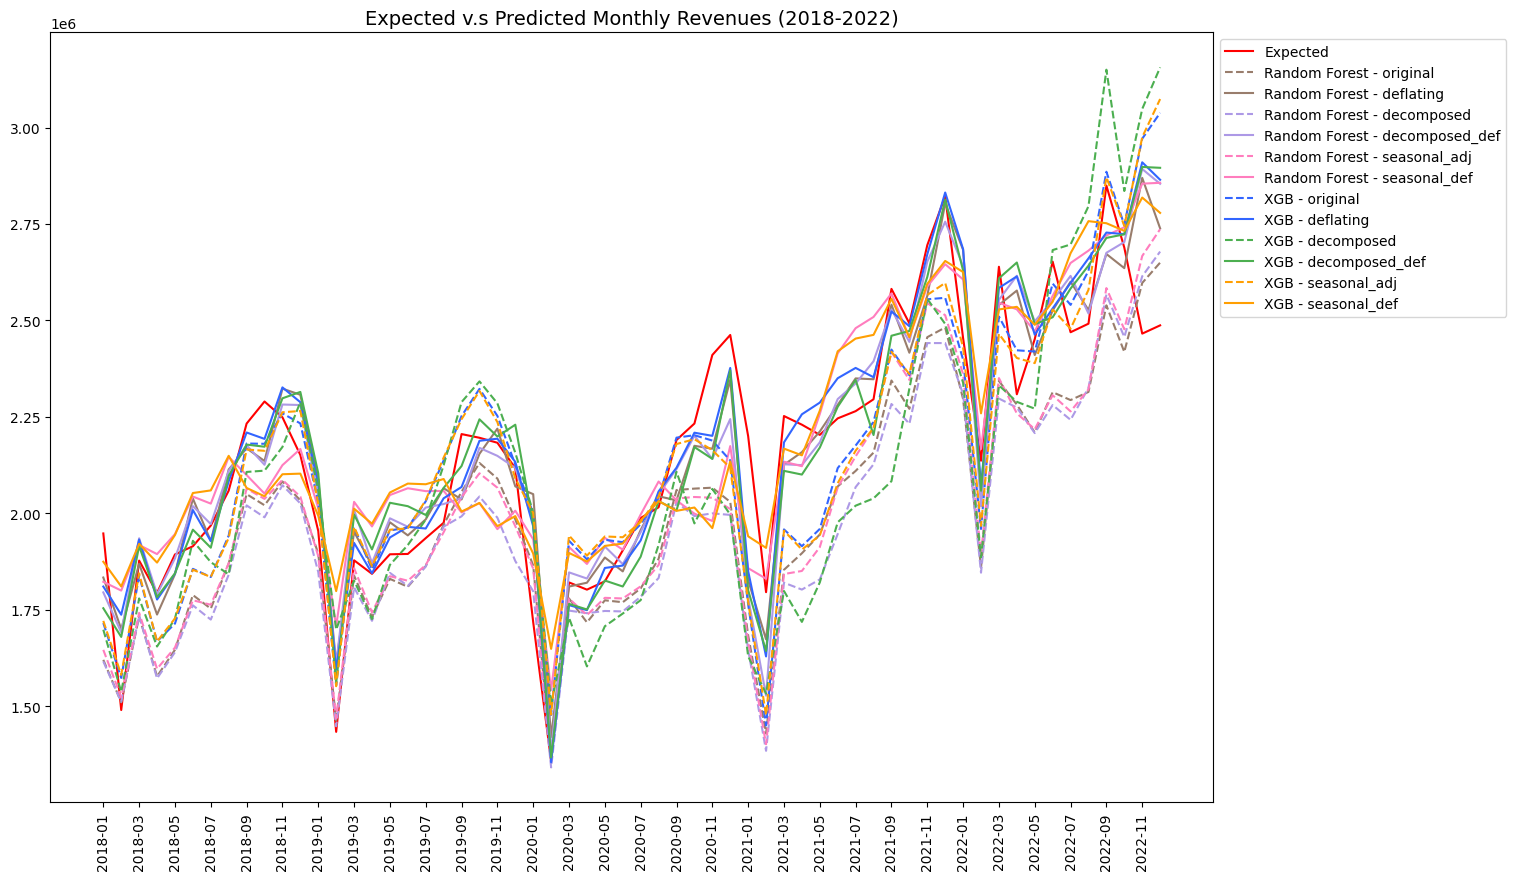

In [ ]:
plotExpectedPredictedRevenues(org_data, pred_rf, pred_xgb, start_y)

#### **8.1.2 分模型畫圖**

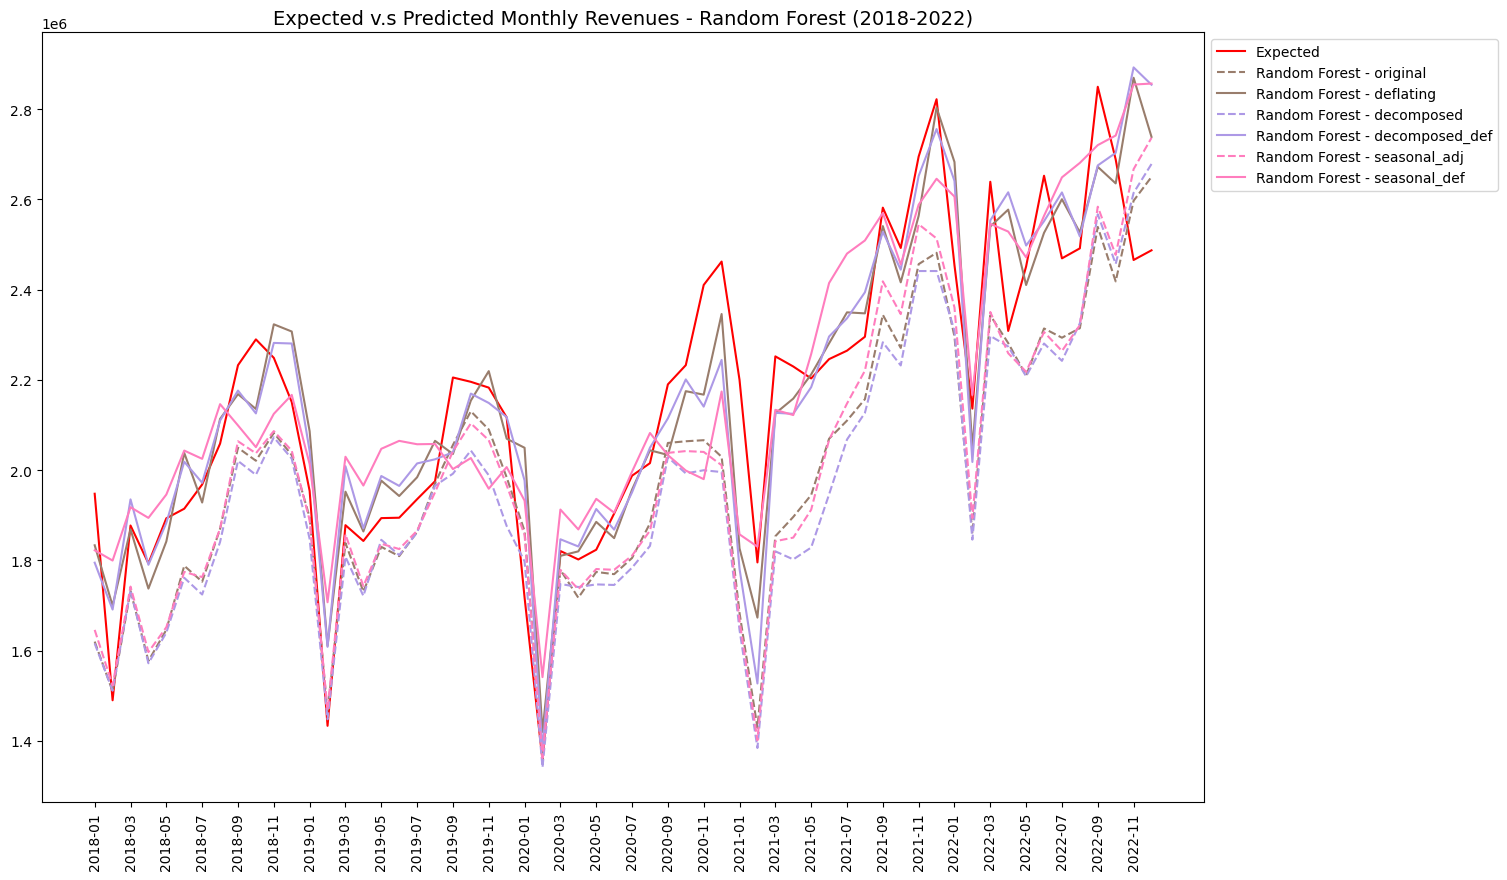

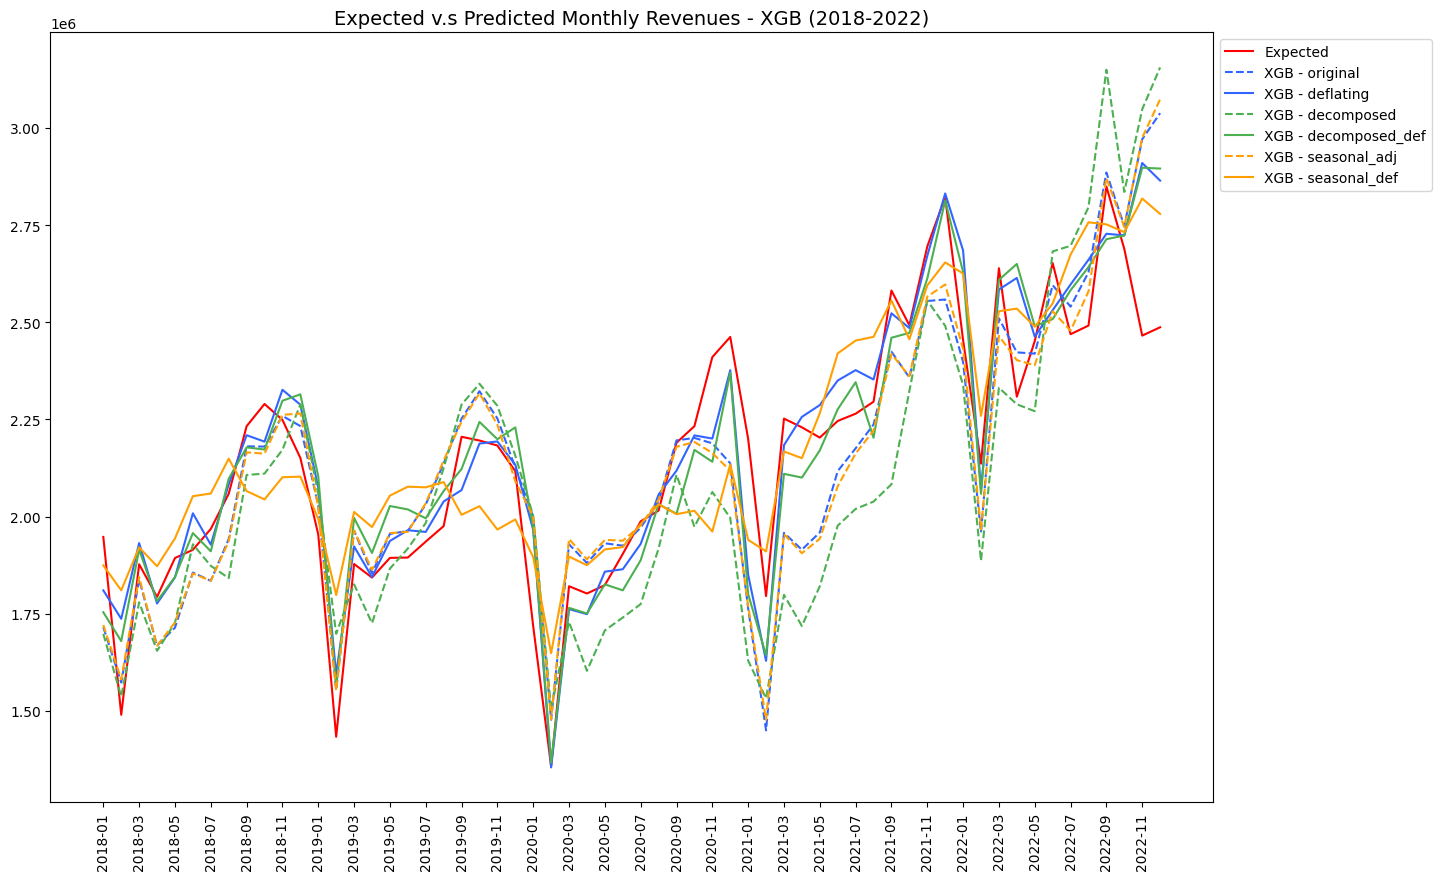

In [ ]:
plotModelExpectedPredictedRevenues(org_data, pred_rf, 'rf', start_y)
plotModelExpectedPredictedRevenues(org_data, pred_xgb, 'xgb', start_y)

### **8.2 Scores: RMSE, MAPE, MAE, MAE%**

*   RMSE (Root Mean Square Error)

  $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y}_i - y_i)^2}$

<br>

*   MAE (Mean Absolute Error)

  $MAE = \frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|$

<br>

*   MAE% (MAE / mean of the sum of y_true)

  $MAE\% = \frac{\frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|}{\frac{1}{n}\sum_{i=1}^n y_i} = \frac{\sum_{i=1}^n|\hat{y}_i - y_i|}{\sum_{i=1}^n y_i}$

<br>

*   MAPE (Mean Absolute Percentage Error)

  $MAPE(\%) = \frac{1}{n}\sum_{i=1}^n \frac{|\hat{y}_i - y_i|}{y_i}$


#### **8.2.1 Plot All Scores**

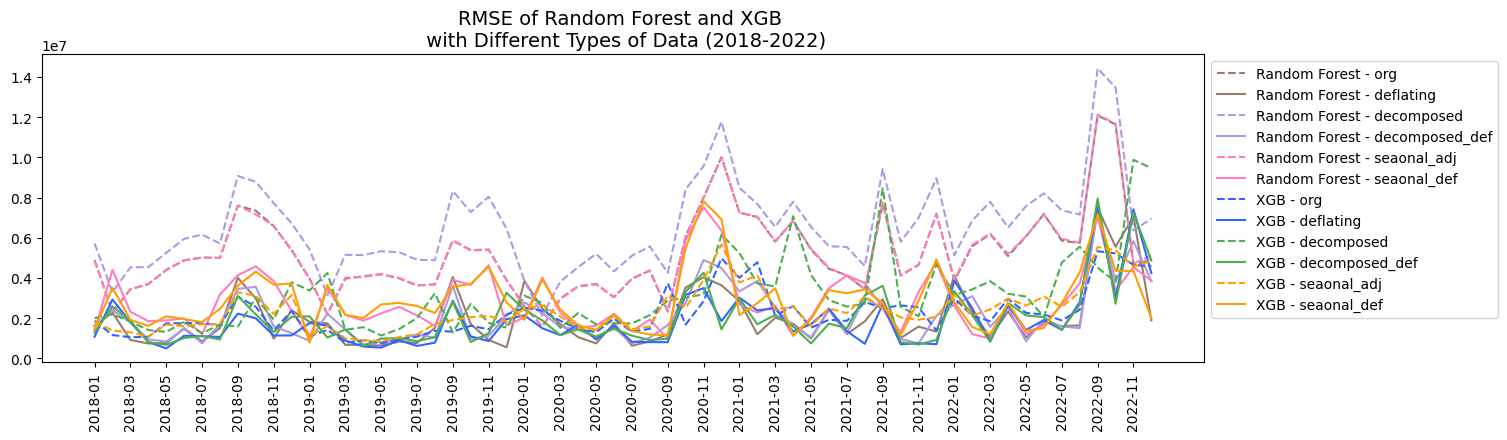

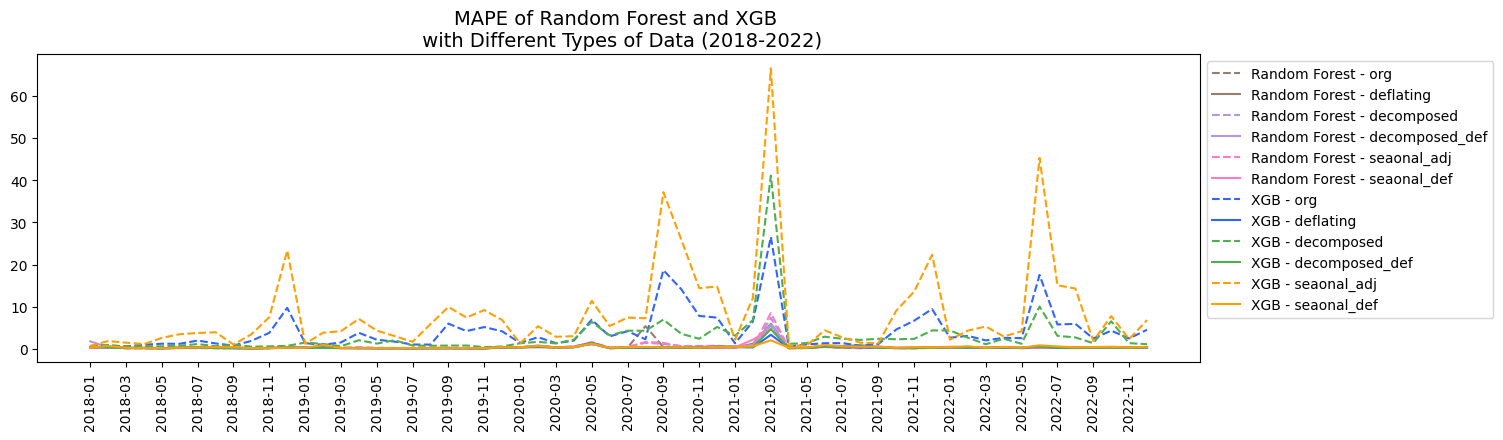

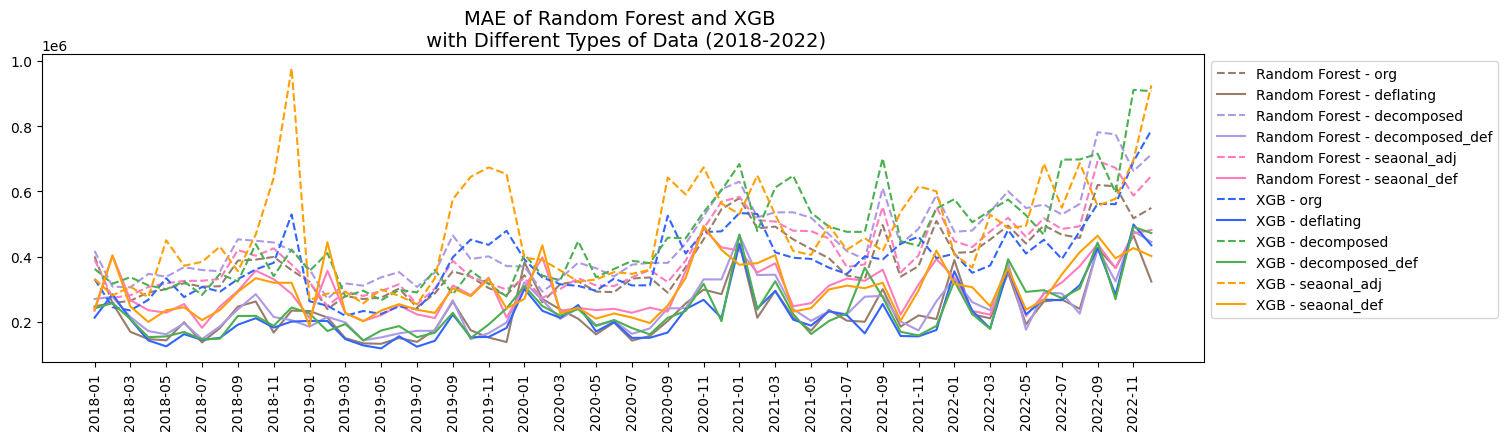

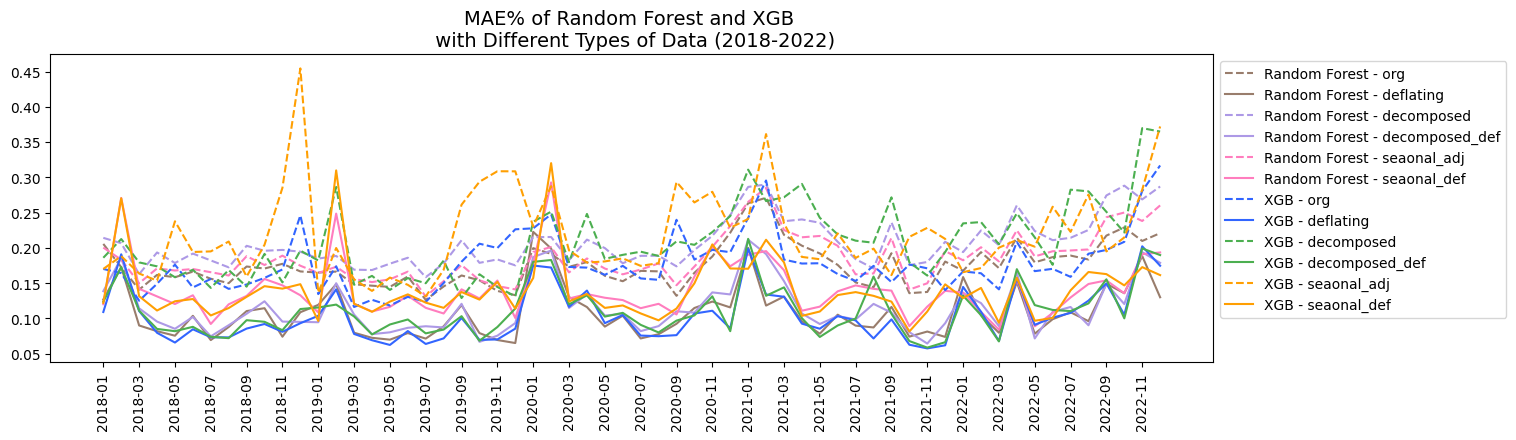

In [ ]:
plotAllScores(scores_rf, scores_xgb, start_y)

#### **8.2.2 分模型畫圖**

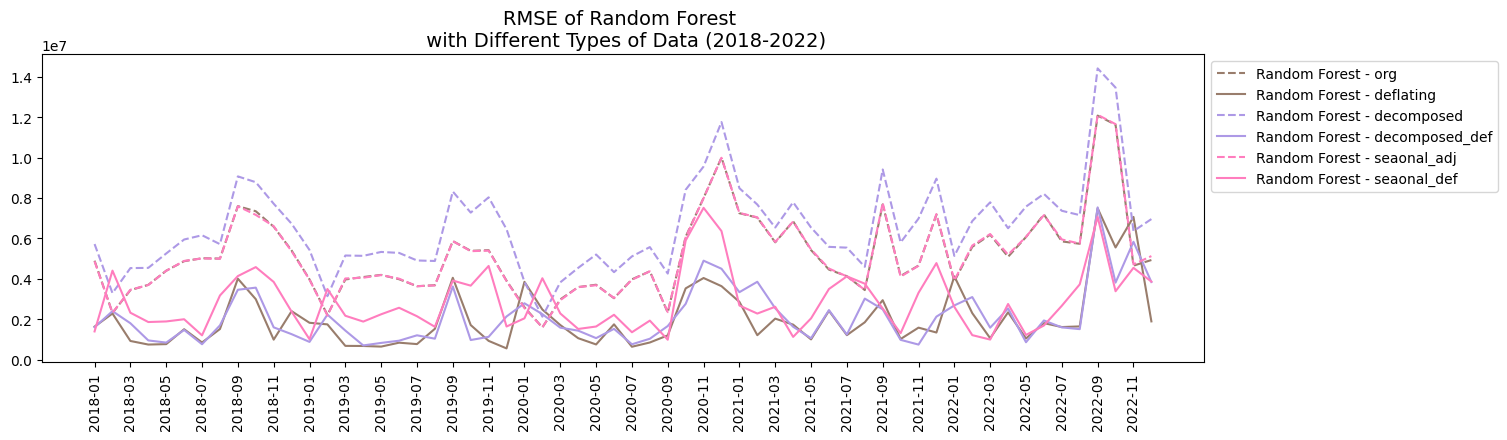

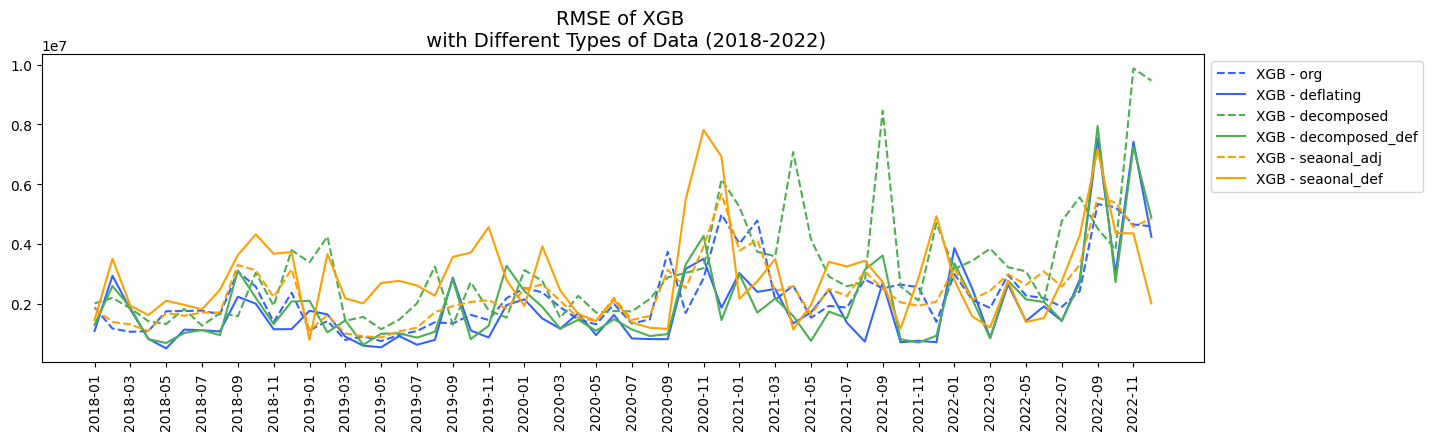

In [ ]:
# RMSE
compareModelScore(scores_rf, scores_xgb, 'RMSE', start_y)  

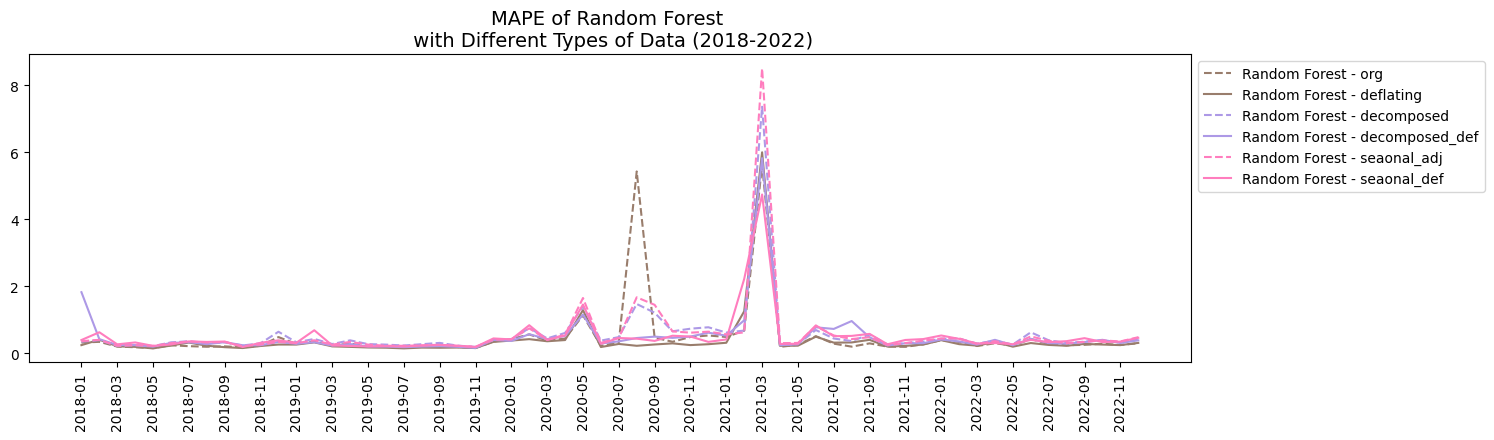

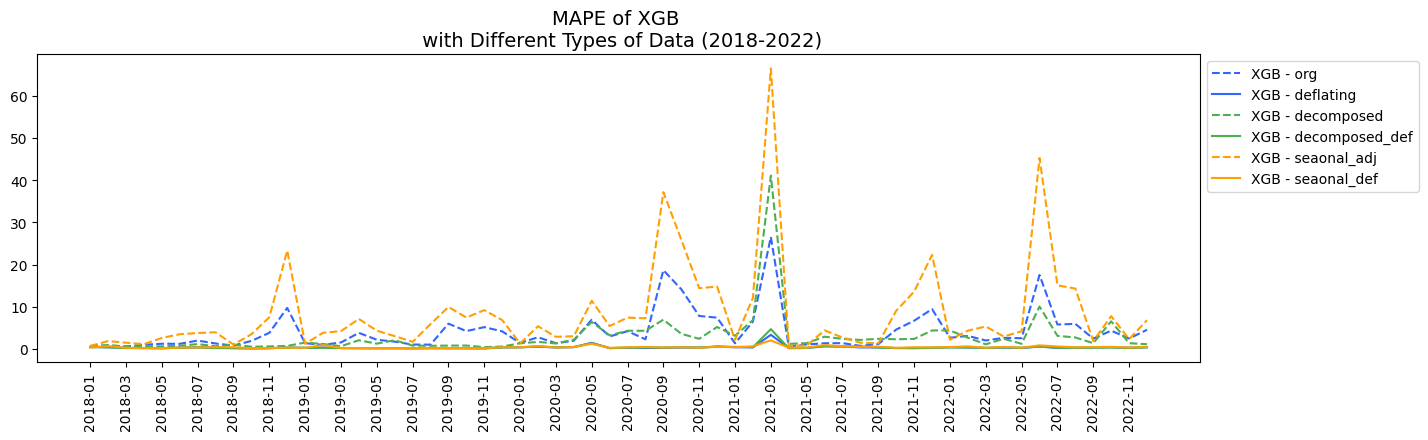

In [ ]:
# MAPE
compareModelScore(scores_rf, scores_xgb, 'MAPE', start_y)  

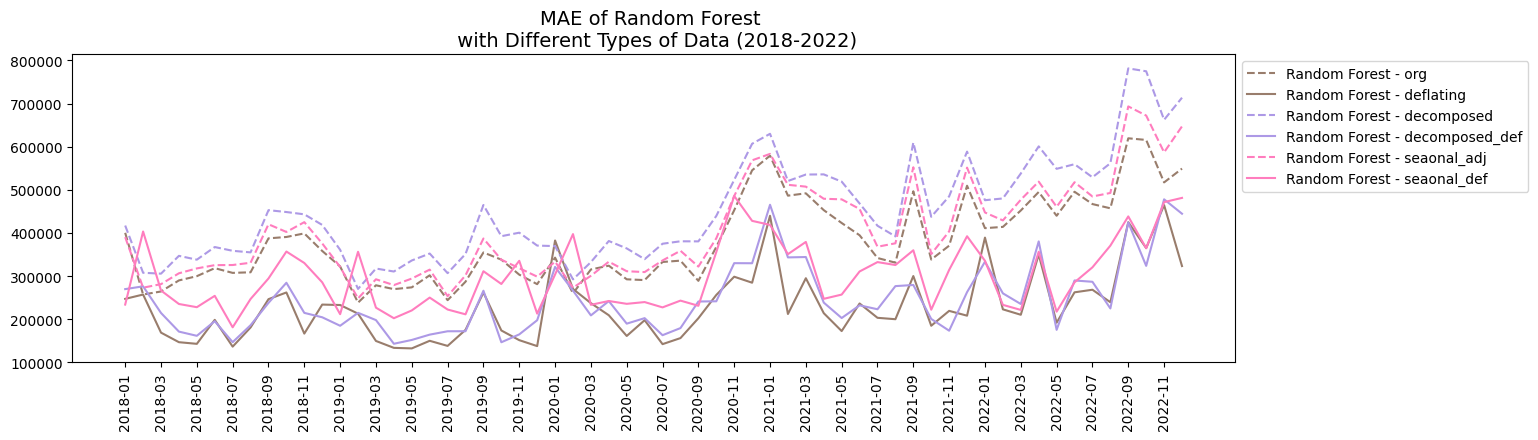

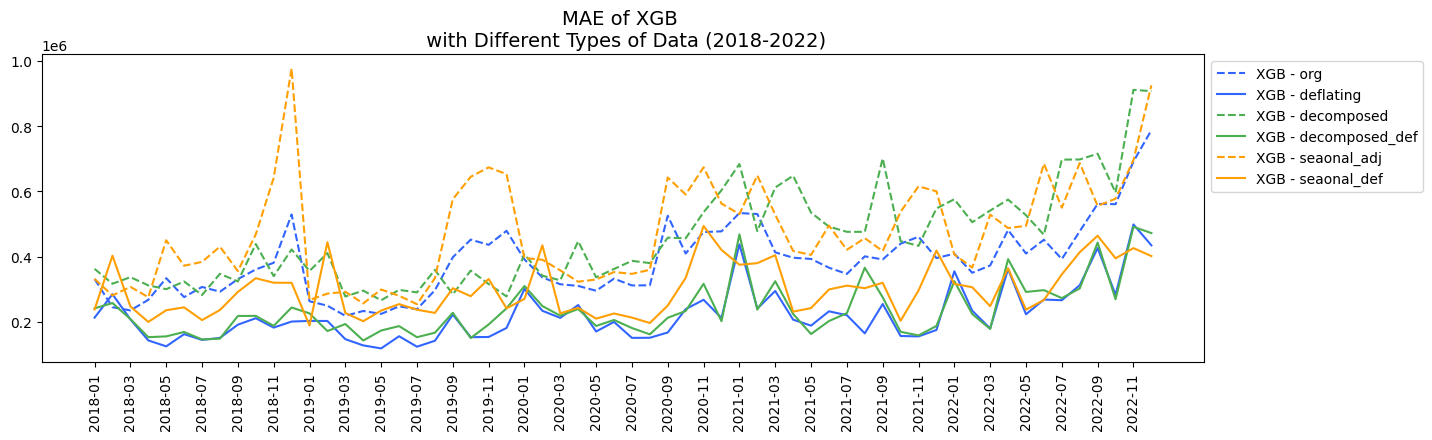

In [ ]:
# MAE
compareModelScore(scores_rf, scores_xgb, 'MAE', start_y)  

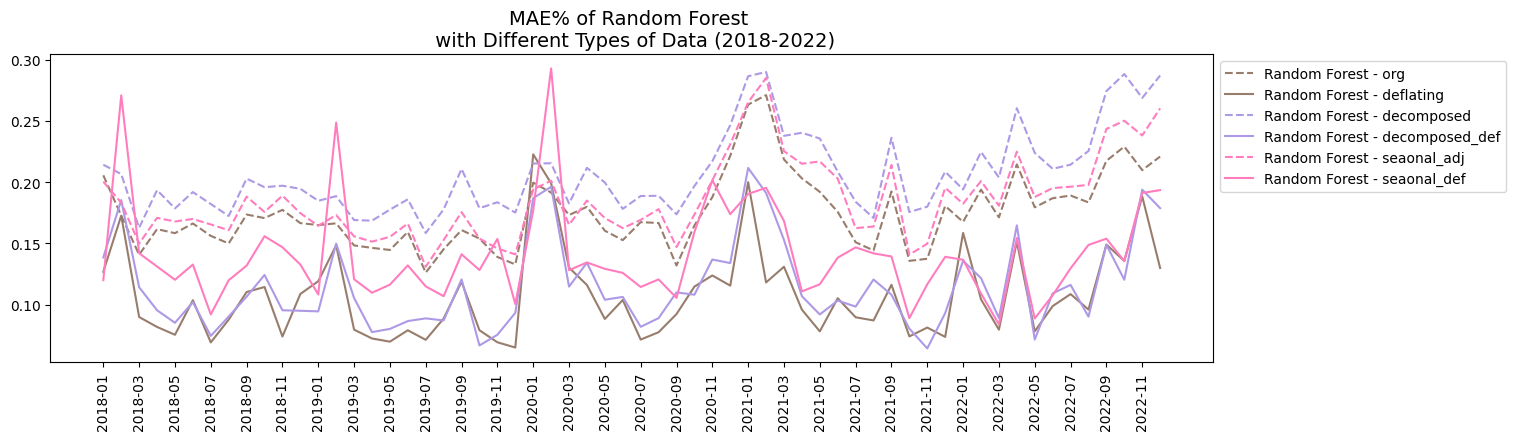

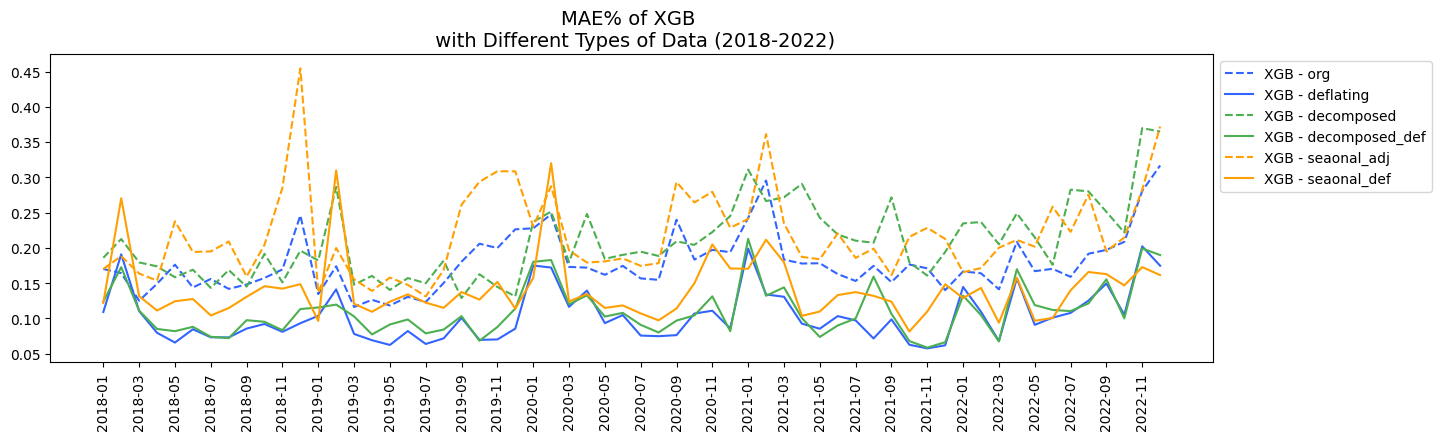

In [ ]:
# MAE%
compareModelScore(scores_rf, scores_xgb, 'MAE%', start_y)  

#### **8.2.3 Boxplot**

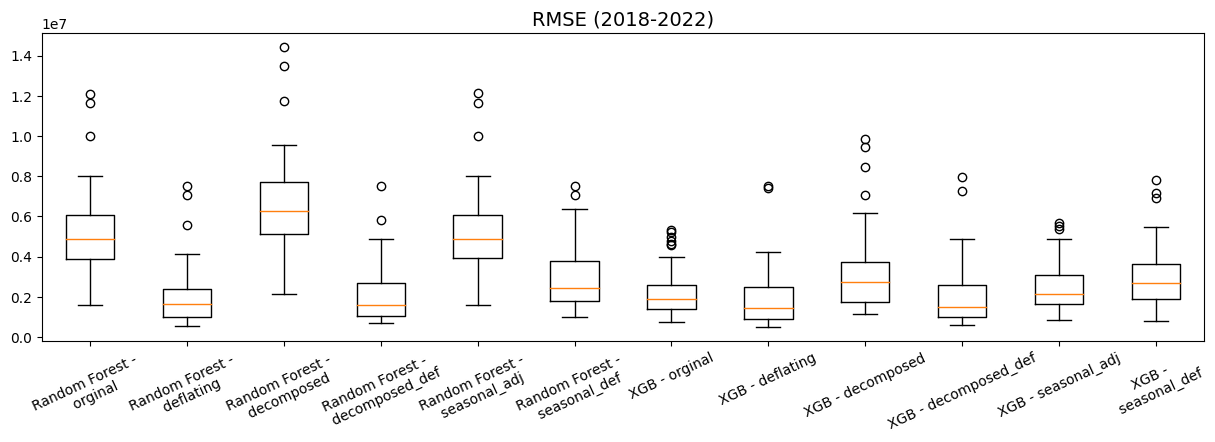

In [ ]:
# RMSE
scoreBoxplotV(scores_rf, scores_xgb, 'RMSE', start_y)  

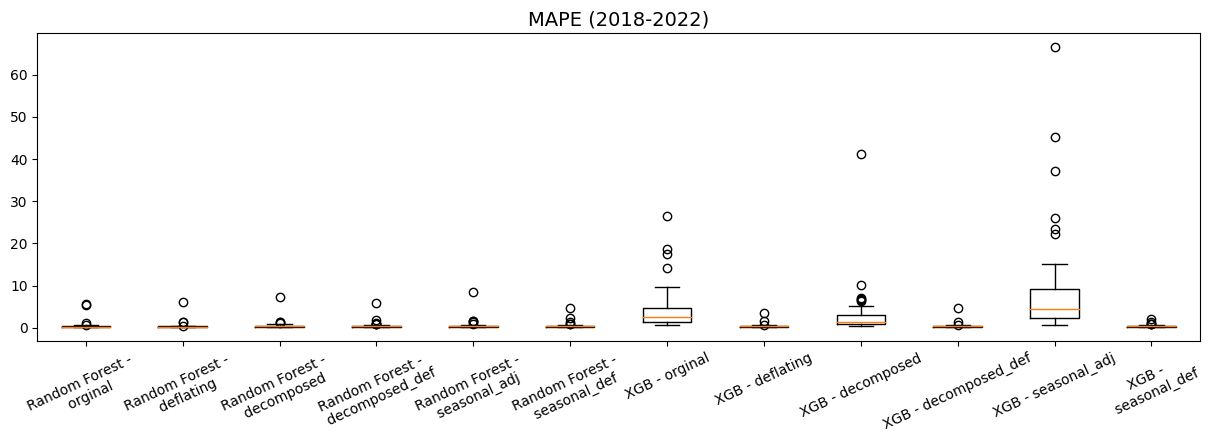

In [ ]:
# MAPE
scoreBoxplotV(scores_rf, scores_xgb, 'MAPE', start_y)  

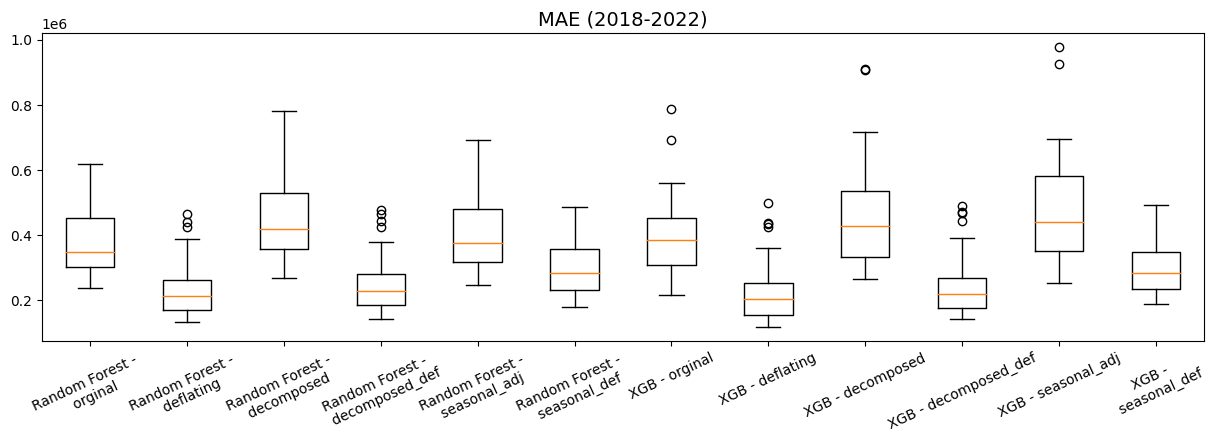

In [ ]:
# MAE
scoreBoxplotV(scores_rf, scores_xgb, 'MAE', start_y)  

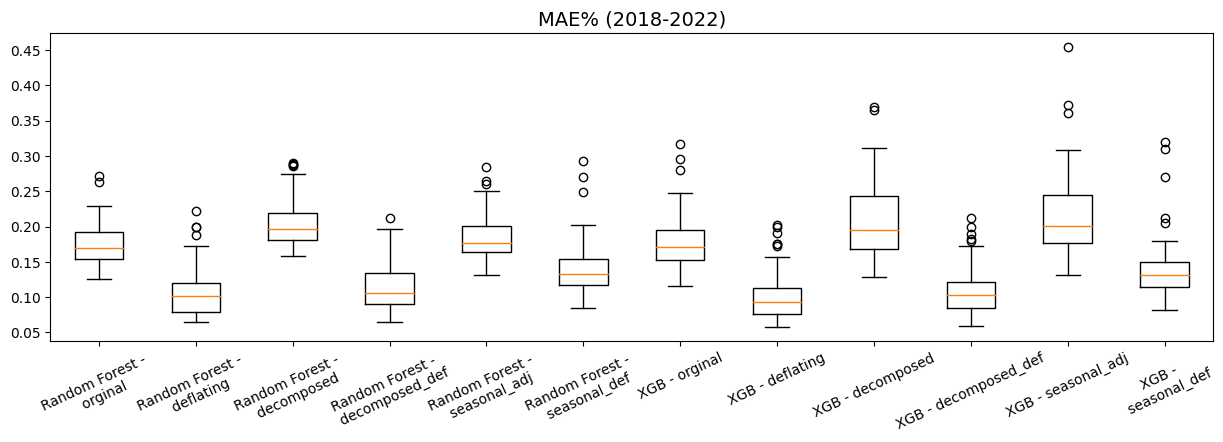

In [ ]:
# MAE%
scoreBoxplotV(scores_rf, scores_xgb, 'MAE%', start_y)  

### **8.3 Feature Importance**

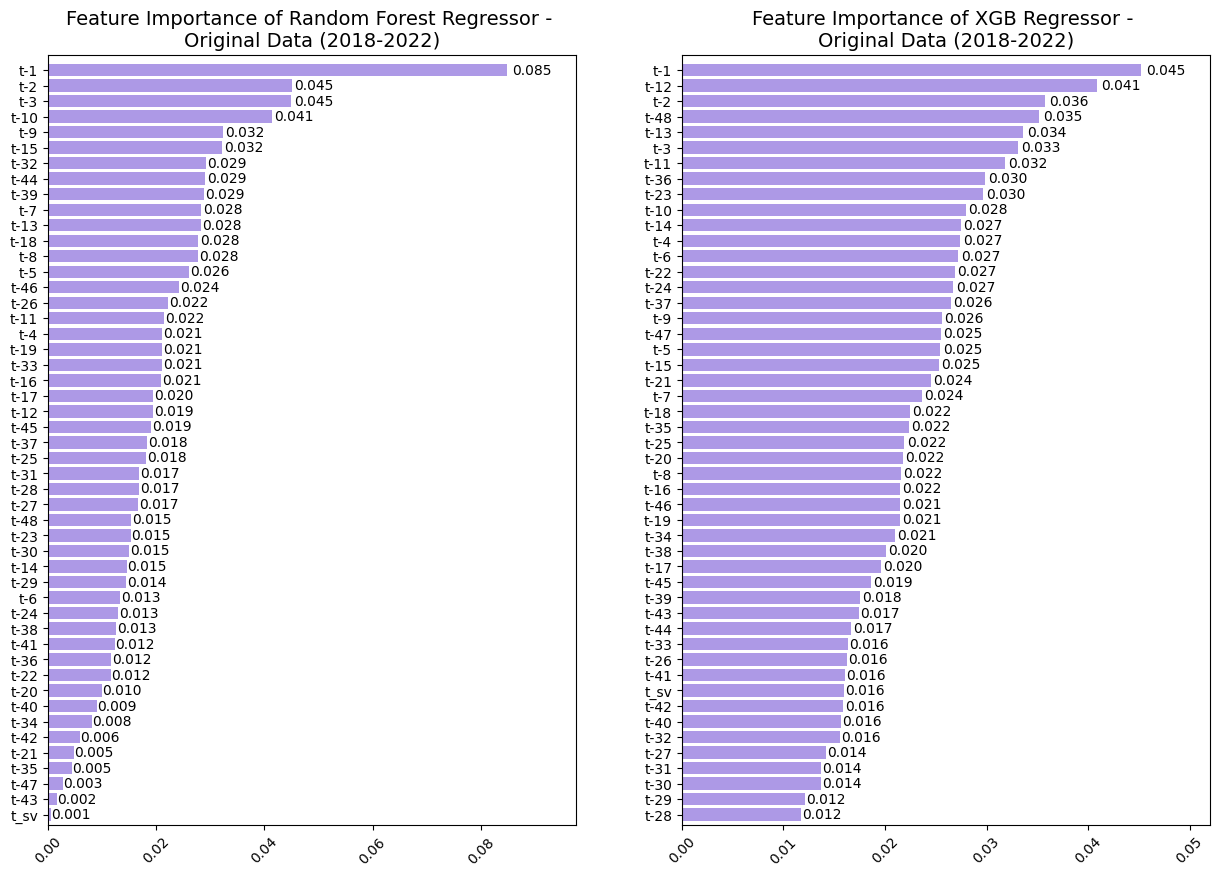

In [ ]:
plotFeatureImportance(feature_importance_rf['org']['org'], feature_importance_xgb['org']['org'], 'org', start_y, 49)

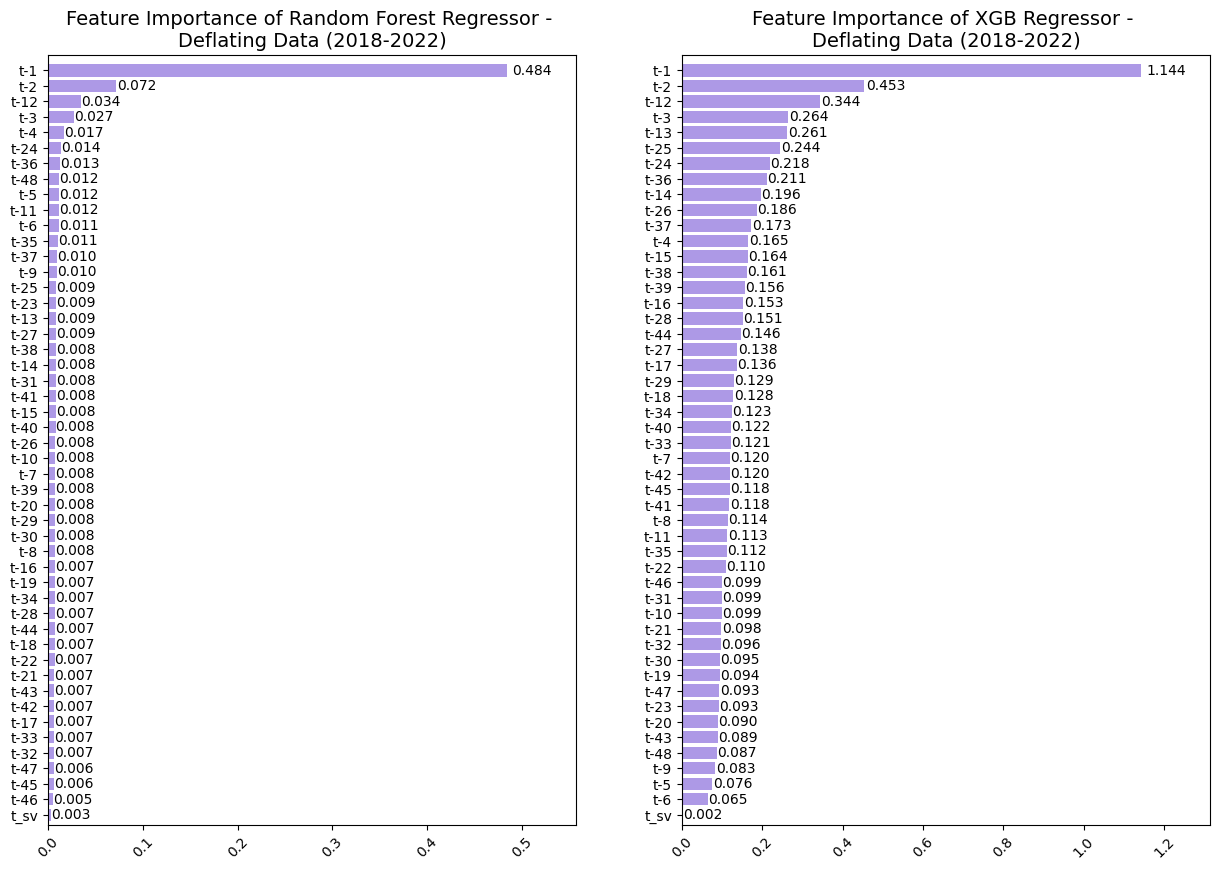

In [ ]:
plotFeatureImportance(feature_importance_rf['def']['org'], feature_importance_xgb['def']['org'], 'def', start_y, 49)

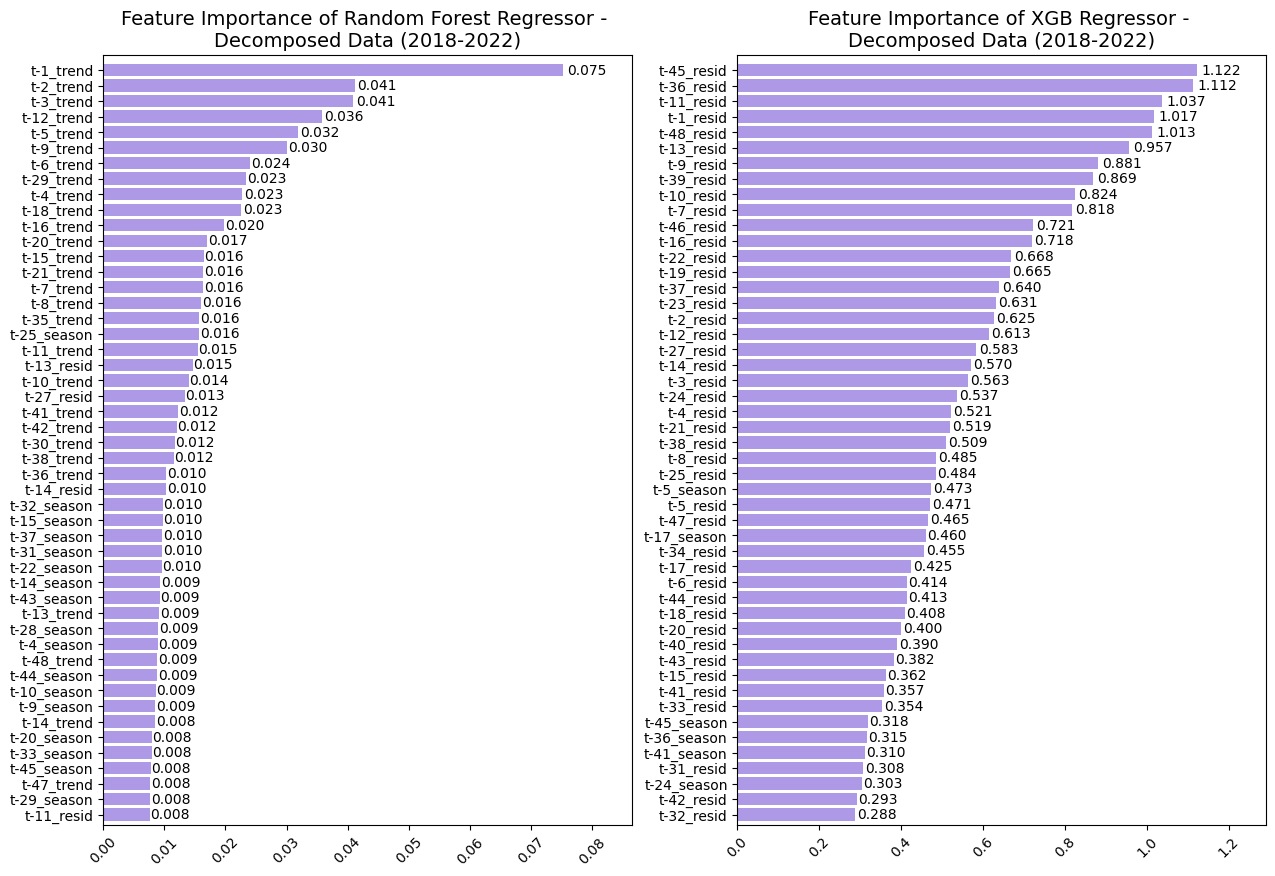

In [ ]:
plotFeatureImportance(feature_importance_rf['org']['dec'], feature_importance_xgb['org']['dec'], 'dec', start_y, 49)

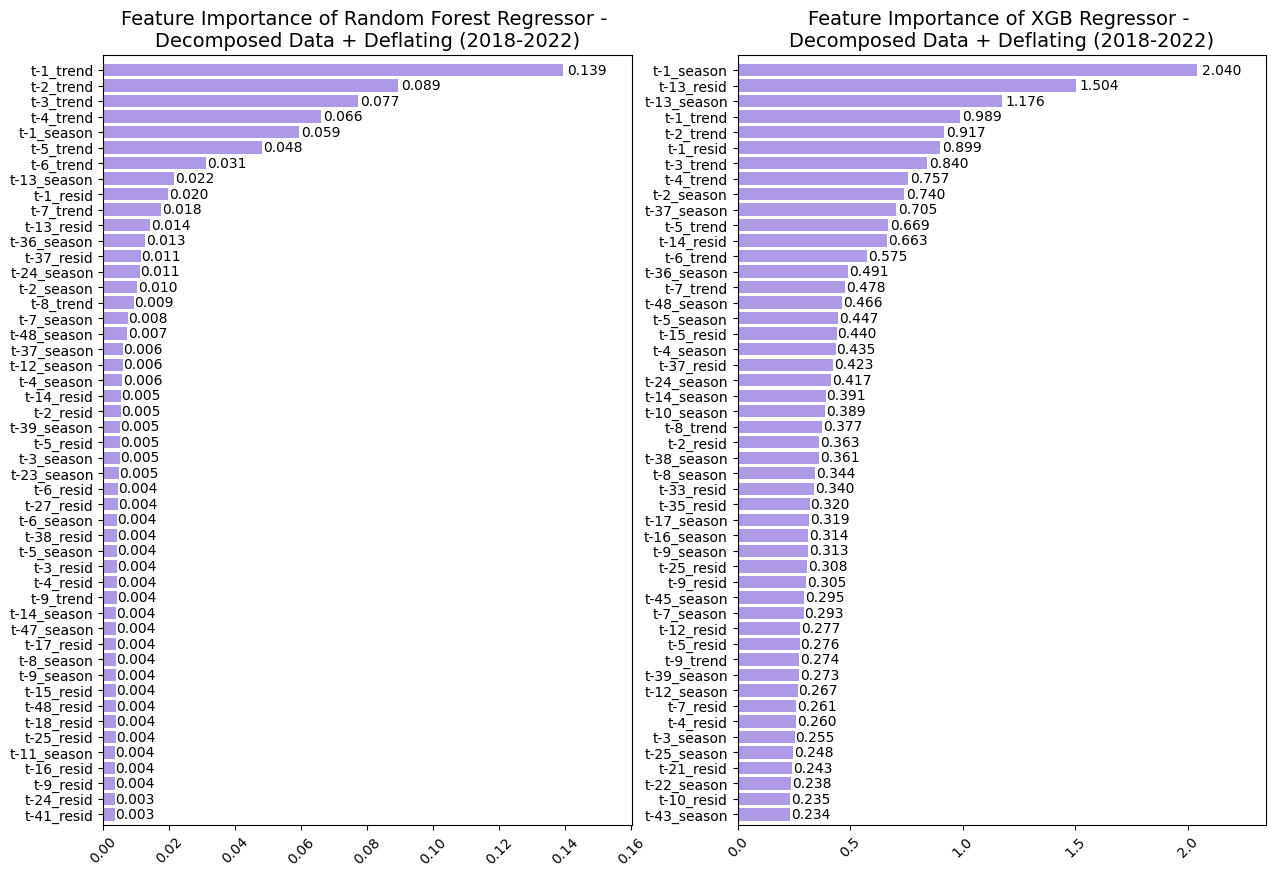

In [ ]:
plotFeatureImportance(feature_importance_rf['def']['dec'], feature_importance_xgb['def']['dec'], 'dec_def', start_y, 49)

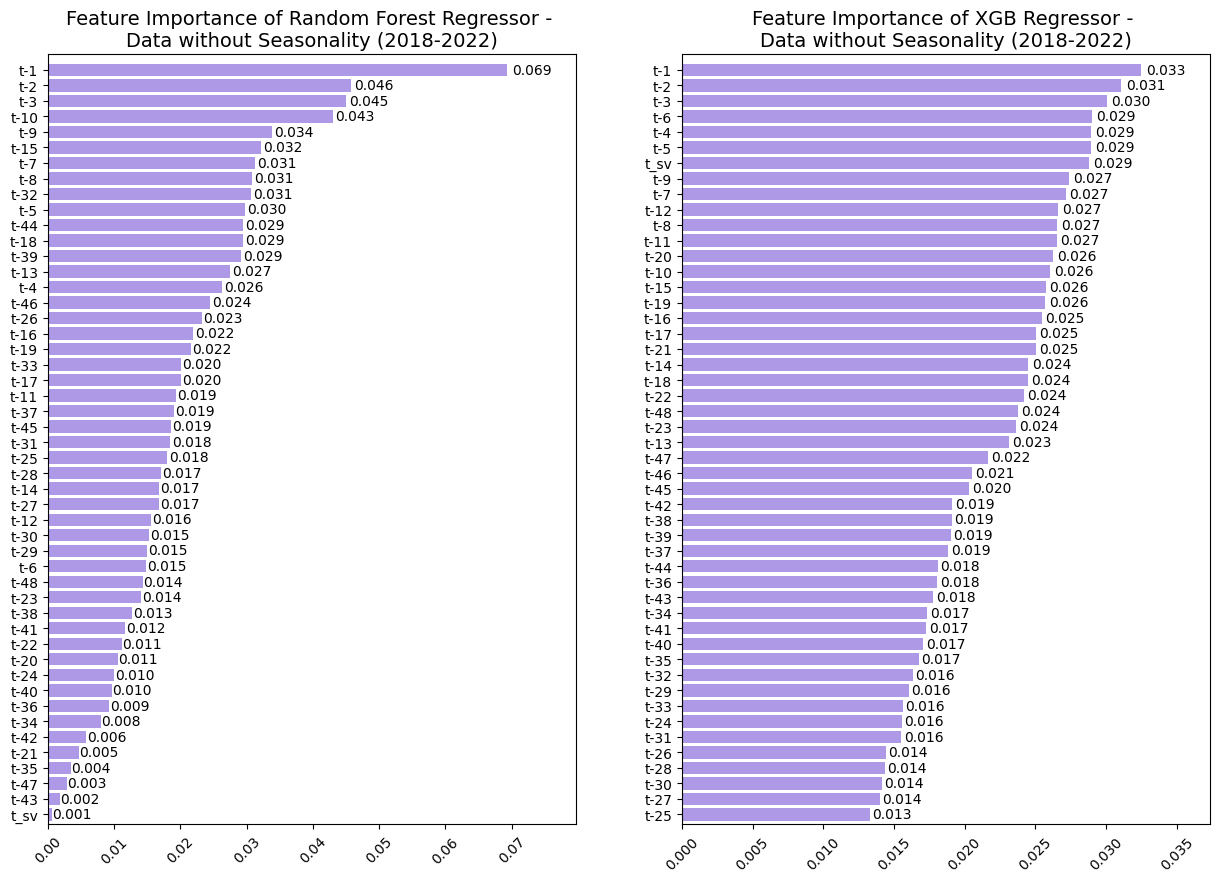

In [ ]:
plotFeatureImportance(feature_importance_rf['org']['season'], feature_importance_xgb['org']['season'], 'season', start_y, 49)

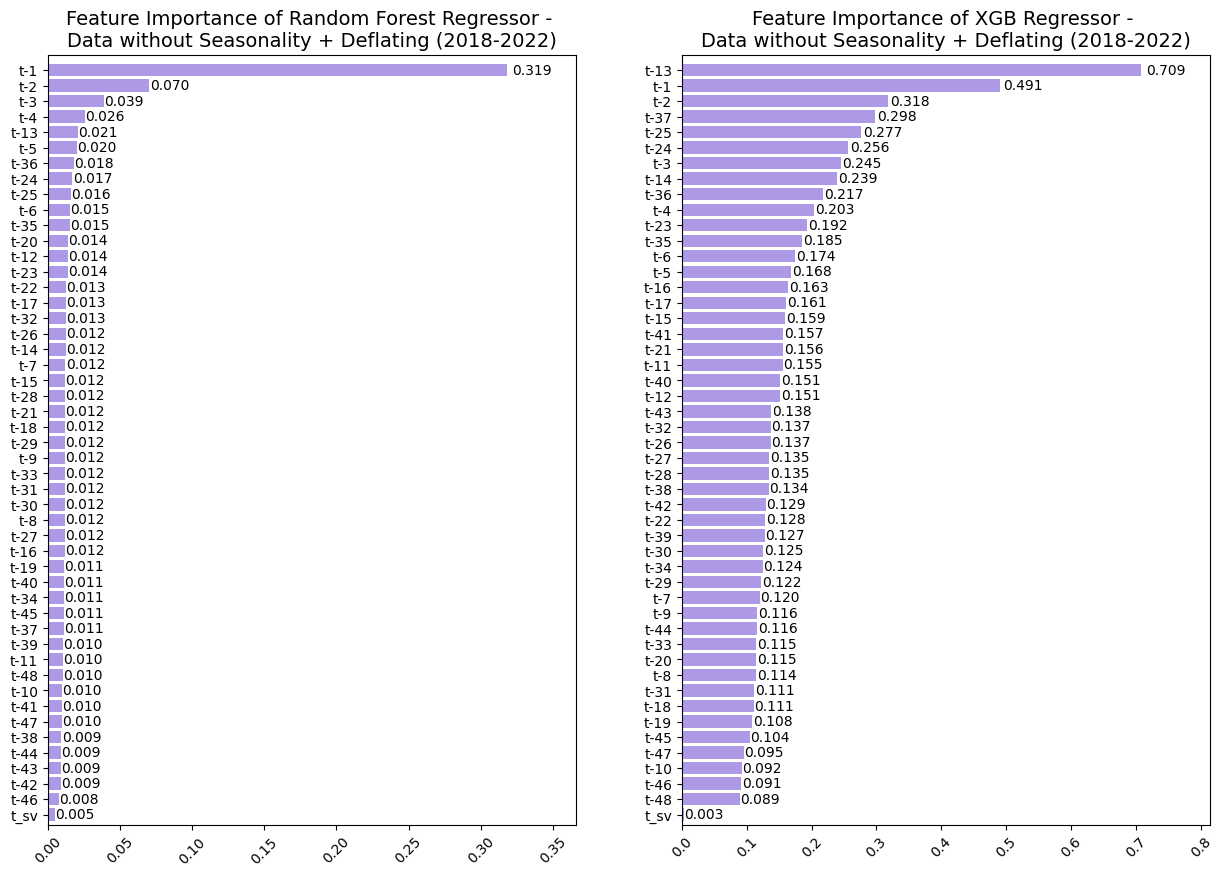

In [ ]:
plotFeatureImportance(feature_importance_rf['def']['season'], feature_importance_xgb['def']['season'], 'season_def', start_y, 49)

## **9. Best and Worst Model**

2023.04.05

In [ ]:
bw = BestWorstModel(scores_rf, scores_xgb)

### **9.1 各模型組合中，預測最好和最差的月份**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|2|6|4|2 (fixed)|2x6x4x2 = 96|

#### **9.1.1 RMSE**

In [ ]:
best_rmse, worst_rmse = bw.findBestWorstForAll('RMSE')

##### **最佳月份**

In [ ]:
best_rmse

modelName    dataType scoreType min_month  min_score
0   Random Forest         org      RMSE   2020-02  1588923.0
4   Random Forest         def      RMSE   2019-12   550835.0
8   Random Forest         dec      RMSE   2020-02  2123278.0
12  Random Forest     dec_def      RMSE   2019-04   698467.0
16  Random Forest      season      RMSE   2020-02  1594817.0
20  Random Forest  season_def      RMSE   2020-09   980719.0
0             XGB         org      RMSE   2019-05   744549.0
4             XGB         def      RMSE   2018-05   498422.0
8             XGB         dec      RMSE   2019-05  1139881.0
12            XGB     dec_def      RMSE   2019-04   619834.0
16            XGB      season      RMSE   2019-05   866118.0
20            XGB  season_def      RMSE   2019-01   786939.0

##### **最差月份**

In [ ]:
worst_rmse

modelName    dataType scoreType max_month   max_score
0   Random Forest         org      RMSE   2022-09  12083643.0
4   Random Forest         def      RMSE   2022-09   7491018.0
8   Random Forest         dec      RMSE   2022-09  14421913.0
12  Random Forest     dec_def      RMSE   2022-09   7537701.0
16  Random Forest      season      RMSE   2022-09  12122688.0
20  Random Forest  season_def      RMSE   2020-11   7514577.0
0             XGB         org      RMSE   2022-09   5330718.0
4             XGB         def      RMSE   2022-09   7524309.0
8             XGB         dec      RMSE   2022-11   9874142.0
12            XGB     dec_def      RMSE   2022-09   7949814.0
16            XGB      season      RMSE   2020-12   5672238.0
20            XGB  season_def      RMSE   2020-11   7816459.0

#### **9.1.2 MAPE**

In [ ]:
best_mape, worst_mape = bw.findBestWorstForAll('MAPE')

##### **最佳月份**

In [ ]:
best_mape

modelName    dataType scoreType min_month  min_score
3   Random Forest         org      MAPE   2018-05     0.1515
7   Random Forest         def      MAPE   2018-05     0.1415
11  Random Forest         dec      MAPE   2019-11     0.1867
15  Random Forest     dec_def      MAPE   2019-11     0.1562
19  Random Forest      season      MAPE   2019-11     0.1900
23  Random Forest  season_def      MAPE   2018-10     0.1827
3             XGB         org      MAPE   2018-03     0.6178
7             XGB         def      MAPE   2019-11     0.1584
11            XGB         dec      MAPE   2019-11     0.4412
15            XGB     dec_def      MAPE   2018-10     0.1500
19            XGB      season      MAPE   2018-01     0.7245
23            XGB  season_def      MAPE   2019-11     0.1906

##### **最差月份**

In [ ]:
worst_mape

modelName    dataType scoreType max_month  max_score
3   Random Forest         org      MAPE   2021-03     5.6224
7   Random Forest         def      MAPE   2021-03     5.9976
11  Random Forest         dec      MAPE   2021-03     7.3587
15  Random Forest     dec_def      MAPE   2021-03     5.8238
19  Random Forest      season      MAPE   2021-03     8.5033
23  Random Forest  season_def      MAPE   2021-03     4.7366
3             XGB         org      MAPE   2021-03    26.5530
7             XGB         def      MAPE   2021-03     3.3734
11            XGB         dec      MAPE   2021-03    41.0953
15            XGB     dec_def      MAPE   2021-03     4.7080
19            XGB      season      MAPE   2021-03    66.5050
23            XGB  season_def      MAPE   2021-03     2.0570

#### **9.1.3 MAE**

In [ ]:
best_mae, worst_mae = bw.findBestWorstForAll('MAE')

##### **最佳月份**

In [ ]:
best_mae

modelName    dataType scoreType min_month  min_score
1   Random Forest         org       MAE   2019-02   238536.0
5   Random Forest         def       MAE   2019-05   132414.0
9   Random Forest         dec       MAE   2019-02   270325.0
13  Random Forest     dec_def       MAE   2019-04   143171.0
17  Random Forest      season       MAE   2019-02   248313.0
21  Random Forest  season_def       MAE   2018-07   181349.0
1             XGB         org       MAE   2019-03   218201.0
5             XGB         def       MAE   2019-05   118225.0
9             XGB         dec       MAE   2019-05   265925.0
13            XGB     dec_def       MAE   2019-04   142503.0
17            XGB      season       MAE   2019-07   253974.0
21            XGB  season_def       MAE   2019-01   188459.0

##### **最差月份**

In [ ]:
worst_mae

modelName    dataType scoreType max_month  max_score
1   Random Forest         org       MAE   2022-09   619589.0
5   Random Forest         def       MAE   2022-11   464648.0
9   Random Forest         dec       MAE   2022-09   781647.0
13  Random Forest     dec_def       MAE   2022-11   478064.0
17  Random Forest      season       MAE   2022-09   693575.0
21  Random Forest  season_def       MAE   2020-11   485917.0
1             XGB         org       MAE   2022-12   787950.0
5             XGB         def       MAE   2022-11   498565.0
9             XGB         dec       MAE   2022-11   911625.0
13            XGB     dec_def       MAE   2022-11   491317.0
17            XGB      season       MAE   2018-12   977447.0
21            XGB  season_def       MAE   2020-11   493822.0

#### **9.1.3 MAE%**

In [ ]:
best_mae_p, worst_mae_p = bw.findBestWorstForAll('MAE%')

##### **最佳月份**

In [ ]:
best_mae_p

modelName    dataType scoreType min_month  min_score
2   Random Forest         org      MAE%   2019-07     0.1262
6   Random Forest         def      MAE%   2019-12     0.0651
10  Random Forest         dec      MAE%   2019-07     0.1585
14  Random Forest     dec_def      MAE%   2021-11     0.0644
18  Random Forest      season      MAE%   2019-07     0.1310
22  Random Forest  season_def      MAE%   2022-03     0.0840
2             XGB         org      MAE%   2019-03     0.1162
6             XGB         def      MAE%   2021-11     0.0575
10            XGB         dec      MAE%   2019-09     0.1289
14            XGB     dec_def      MAE%   2021-11     0.0586
18            XGB      season      MAE%   2019-07     0.1312
22            XGB  season_def      MAE%   2021-10     0.0815

##### **最差月份**

In [ ]:
worst_mae_p

modelName    dataType scoreType max_month  max_score
2   Random Forest         org      MAE%   2021-02     0.2710
6   Random Forest         def      MAE%   2020-01     0.2227
10  Random Forest         dec      MAE%   2021-02     0.2899
14  Random Forest     dec_def      MAE%   2021-01     0.2116
18  Random Forest      season      MAE%   2021-02     0.2850
22  Random Forest  season_def      MAE%   2020-02     0.2928
2             XGB         org      MAE%   2022-12     0.3168
6             XGB         def      MAE%   2022-11     0.2022
10            XGB         dec      MAE%   2022-11     0.3697
14            XGB     dec_def      MAE%   2021-01     0.2128
18            XGB      season      MAE%   2018-12     0.4544
22            XGB  season_def      MAE%   2020-02     0.3201

### **9.2 Random Forest 和 XGB 各自預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|2|1|4|2 (fixed)|2x1x4x2 = 16|

In [ ]:
imp_plot = BestWorstModelFeatureImportancePlot(feature_importance_rf, feature_importance_xgb, bw.best_rf, bw.worst_rf, bw.best_xgb, bw.worst_xgb, bw.best_all, bw.worst_all, start_y)
top_k = 5

#### **9.2.1 RMSE**

##### **最佳模型**

In [ ]:
# Random Forest
bw.best_rf['RMSE']

modelName dataType scoreType min_month  min_score
4  Random Forest      def      RMSE   2019-12   550835.0

In [ ]:
# XGB
bw.best_xgb['RMSE']

modelName dataType scoreType min_month  min_score
4       XGB      def      RMSE   2018-05   498422.0

##### **最差模型**

In [ ]:
# Random Forest
bw.worst_rf['RMSE']

modelName dataType scoreType max_month   max_score
8  Random Forest      dec      RMSE   2022-09  14421913.0

In [ ]:
# XGB
bw.worst_xgb['RMSE']

modelName dataType scoreType max_month  max_score
8       XGB      dec      RMSE   2022-11  9874142.0

##### **Feature Importance**



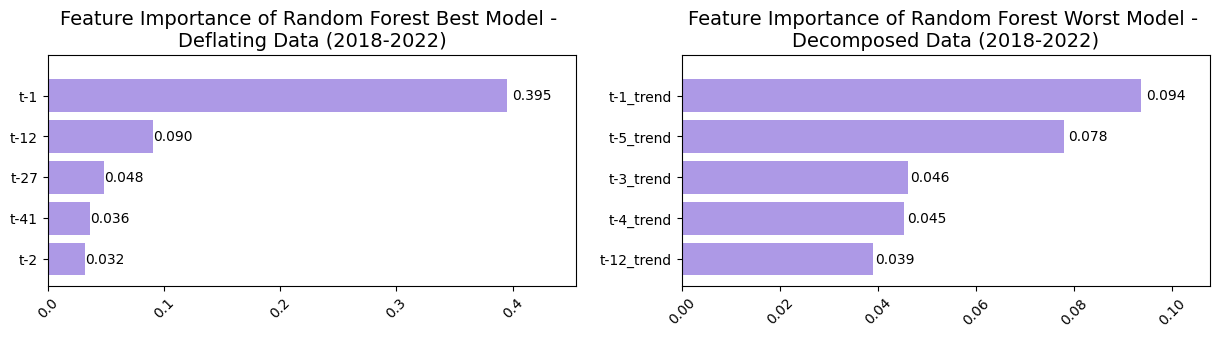

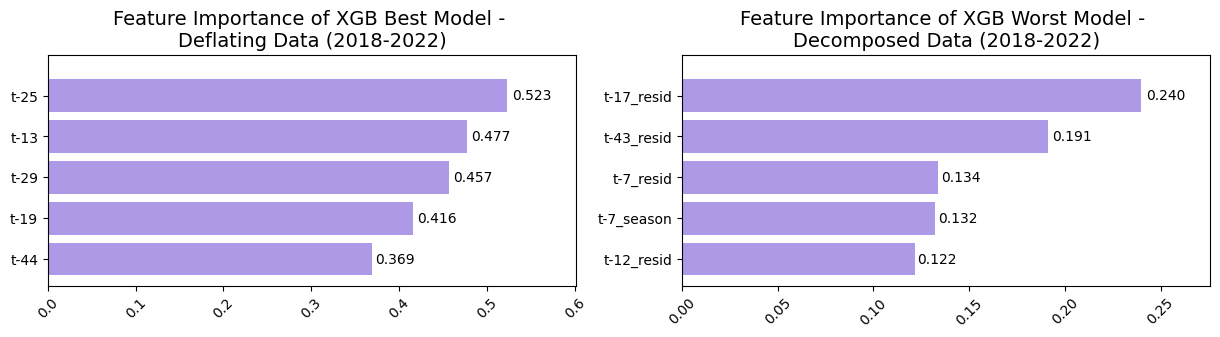

In [ ]:
imp_plot.plotBestWorstFeatureImportance('RMSE', top_k)

#### **9.2.2 MAPE**

##### **最佳模型**

In [ ]:
# Random Forest
bw.best_rf['MAPE']

modelName dataType scoreType min_month  min_score
7  Random Forest      def      MAPE   2018-05     0.1415

In [ ]:
# XGB
bw.best_xgb['MAPE']

modelName dataType scoreType min_month  min_score
15       XGB  dec_def      MAPE   2018-10       0.15

##### **最差模型**

In [ ]:
# Random Forest
bw.worst_rf['MAPE']

modelName dataType scoreType max_month  max_score
19  Random Forest   season      MAPE   2021-03     8.5033

In [ ]:
# XGB
bw.worst_xgb['MAPE']

modelName dataType scoreType max_month  max_score
19       XGB   season      MAPE   2021-03     66.505

##### **Feature Importance**



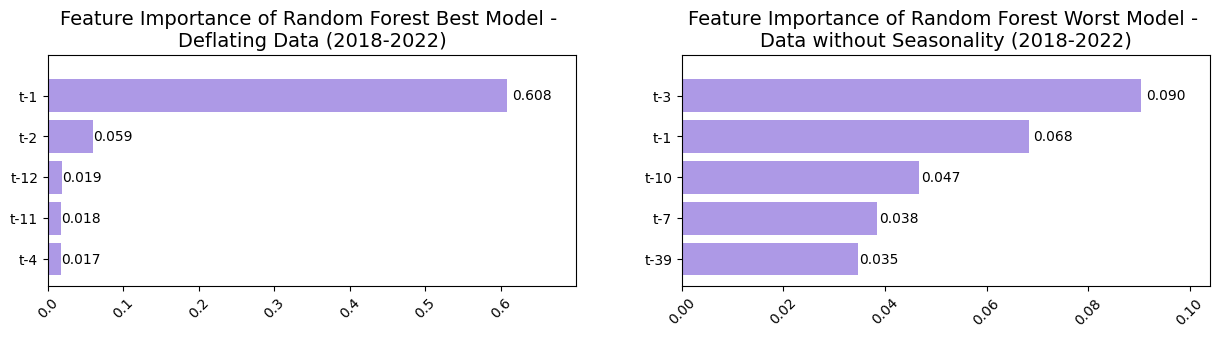

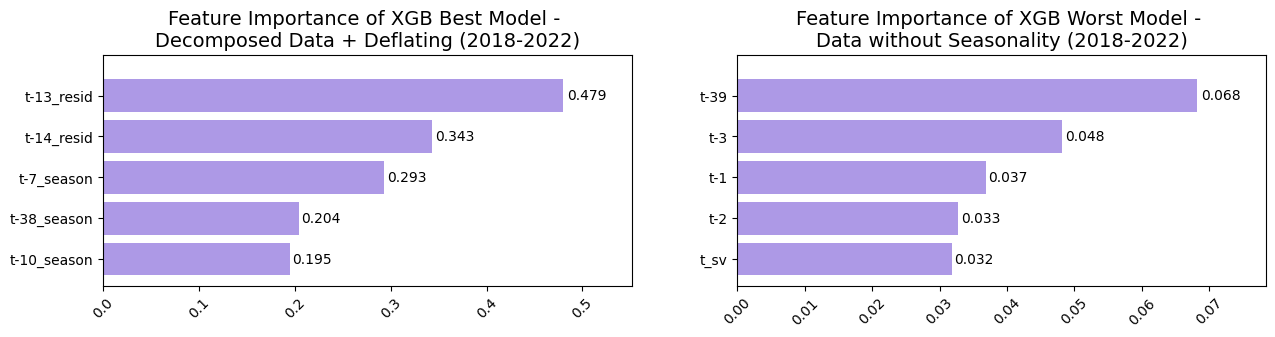

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAPE', top_k)

#### **9.2.3 MAE**

##### **最佳模型**

In [ ]:
# Random Forest
bw.best_rf['MAE']

modelName dataType scoreType min_month  min_score
5  Random Forest      def       MAE   2019-05   132414.0

In [ ]:
# XGB
bw.best_xgb['MAE']

modelName dataType scoreType min_month  min_score
5       XGB      def       MAE   2019-05   118225.0

##### **最差模型**

In [ ]:
# Random Forest
bw.worst_rf['MAE']

modelName dataType scoreType max_month  max_score
9  Random Forest      dec       MAE   2022-09   781647.0

In [ ]:
# XGB
bw.worst_xgb['MAE']

modelName dataType scoreType max_month  max_score
17       XGB   season       MAE   2018-12   977447.0

##### **Feature Importance**



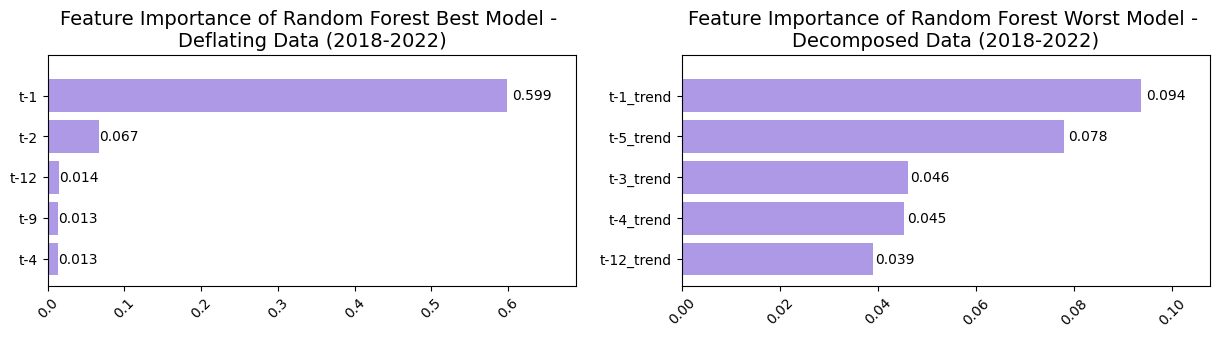

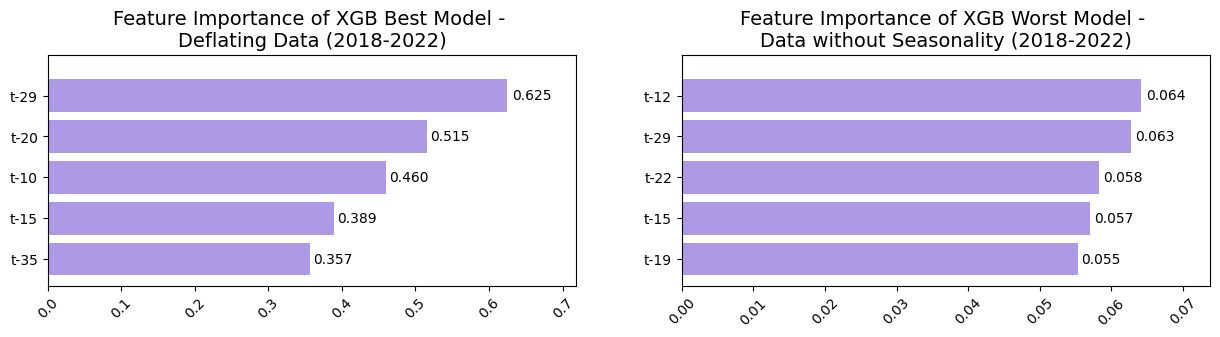

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAE', top_k)

#### **9.2.4 MAE%**

##### **最佳模型**

In [ ]:
# Random Forest
bw.best_rf['MAE%']

modelName dataType scoreType min_month  min_score
14  Random Forest  dec_def      MAE%   2021-11     0.0644

In [ ]:
# XGB
bw.best_xgb['MAE%']

modelName dataType scoreType min_month  min_score
6       XGB      def      MAE%   2021-11     0.0575

##### **最差模型**

In [ ]:
# Random Forest
bw.worst_rf['MAE%']

modelName    dataType scoreType max_month  max_score
22  Random Forest  season_def      MAE%   2020-02     0.2928

In [ ]:
# XGB
bw.worst_xgb['MAE%']

modelName dataType scoreType max_month  max_score
18       XGB   season      MAE%   2018-12     0.4544

##### **Feature Importance**



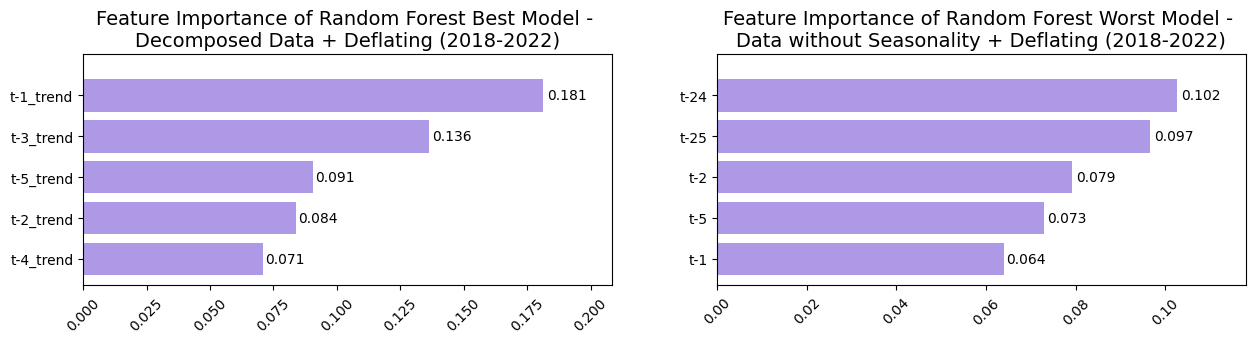

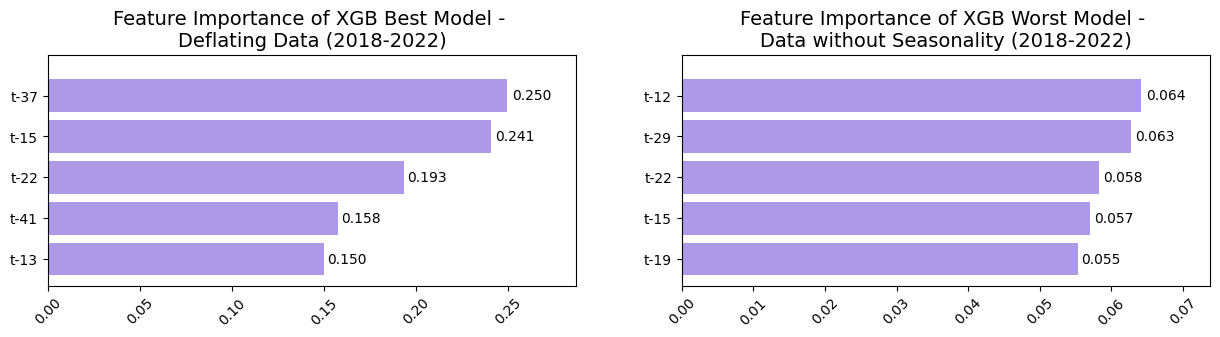

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAE%', top_k)

### **9.3 所有模型組合中，預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|1|1|4|2 (fixed)|1x1x4x2 = 8|


#### **9.3.1 RMSE**

##### **最佳模型**

In [ ]:
bw.best_all['RMSE']

modelName dataType scoreType min_month  min_score
4       XGB      def      RMSE   2018-05   498422.0

##### **最差模型**

In [ ]:
bw.worst_all['RMSE']

modelName dataType scoreType max_month   max_score
8  Random Forest      dec      RMSE   2022-09  14421913.0

##### **Feature Importance**



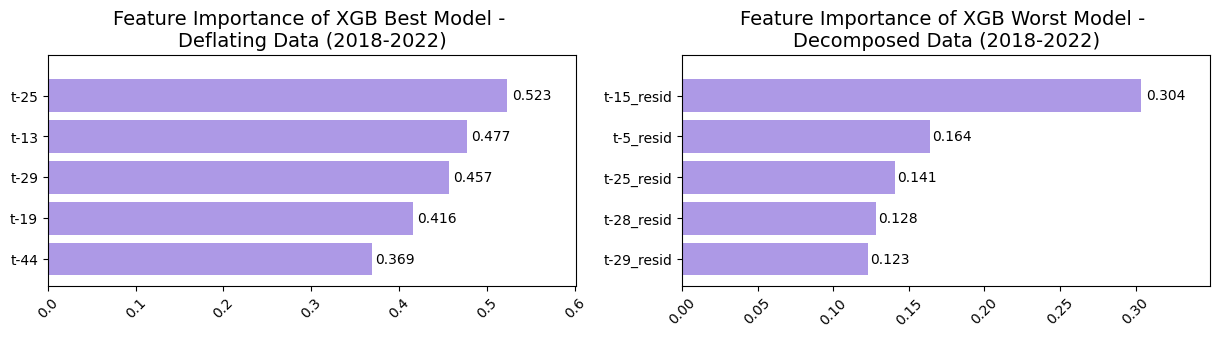

In [ ]:
imp_plot.plotBestWorstFeatureImportance('RMSE', top_k, all = True)

#### **9.3.2 MAPE**

##### **最佳模型**

In [ ]:
bw.best_all['MAPE']

modelName dataType scoreType min_month  min_score
7  Random Forest      def      MAPE   2018-05     0.1415

##### **最差模型**

In [ ]:
bw.worst_all['MAPE']

modelName dataType scoreType max_month  max_score
19       XGB   season      MAPE   2021-03     66.505

##### **Feature Importance**



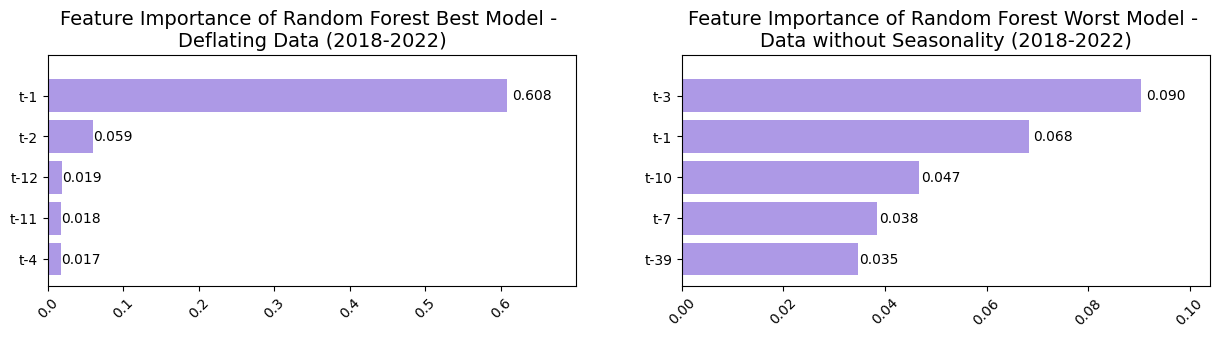

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAPE', top_k, all = True)

#### **9.3.3 MAE**

##### **最佳模型**

In [ ]:
bw.best_all['MAE']

modelName dataType scoreType min_month  min_score
5       XGB      def       MAE   2019-05   118225.0

##### **最差模型**

In [ ]:
bw.worst_all['MAE']

modelName dataType scoreType max_month  max_score
17       XGB   season       MAE   2018-12   977447.0

##### **Feature Importance**



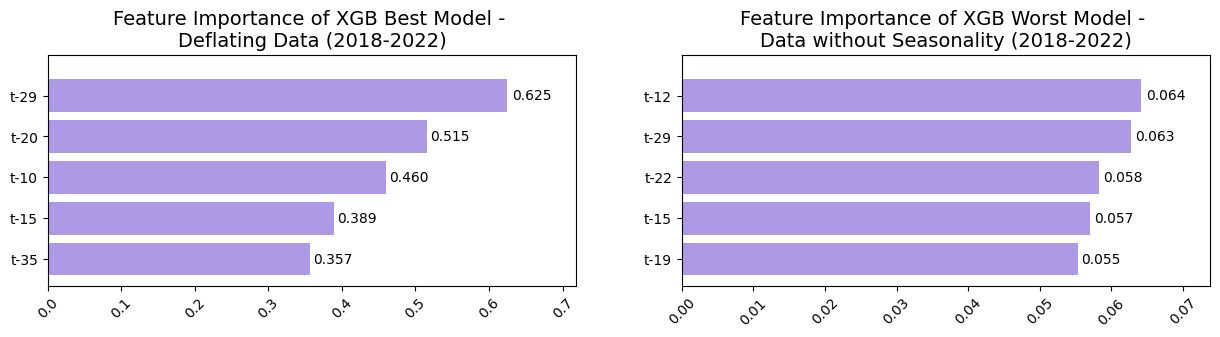

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAE', top_k, all = True)

#### **9.3.4 MAE%**

##### **最佳模型**

In [ ]:
bw.best_all['MAE%']

modelName dataType scoreType min_month  min_score
6       XGB      def      MAE%   2021-11     0.0575

##### **最差模型**

In [ ]:
bw.worst_all['MAE%']

modelName dataType scoreType max_month  max_score
18       XGB   season      MAE%   2018-12     0.4544

##### **Feature Importance**



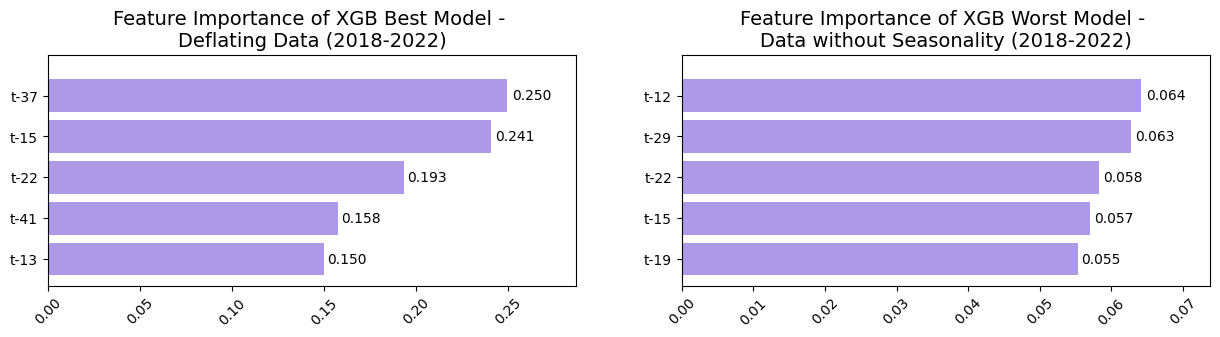

In [ ]:
imp_plot.plotBestWorstFeatureImportance('MAE%', top_k, all = True)